# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [K-Means](#km)
5. [Hierarchical](#h)
6. [DBSCAN](#d)
7. [UMAP](#u)

# 1. Library Imports
<a id='li'></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from utils2 import *
from utils1 import knn_imputer
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# 2. Data Preparation
<a id='dp'></a>

#### Import the data

In [14]:
data = pd.read_csv('Data/New_Data/project_data_99_educ_perc.csv')

#### Encode categorical variables

In [15]:
data['relevance_criteria'] = data['relevance_criteria'].replace({'Priority': 2, 'Caution': 1, 'Unknown': 0})
data['gender'] = data['gender'].replace({'female': 0, 'male': 1})
data['education'] = data['education'].replace({np.nan: 0, 'High School': 1, 'Degree': 2, 'BSc Degree': 3, 'MSc Degree': 4})
data.loc[data['returns'] > 0, 'returns'] = 1

#### Define metrics to study

In [16]:
demographic_metrics_all = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'zip_code', 'education', 'gender']
demographic_metrics = ['frequency_items', 'potencial_score', 'longevity_months', 'relevance_criteria', 'recency_in_weeks', 'promotional_percentage', 'returns', 'flaged', 'credit_factor', 'education']


In [17]:
demographic = data[demographic_metrics_all]
demographic_selection = data[demographic_metrics]


#### Scale the data

In [18]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [19]:
dem_no_scl = demographic_selection.copy()
dem_st_scl = standard.fit_transform(demographic_selection)
dem_mm_scl = minmax.fit_transform(demographic_selection)
dem_rb_scl = robust.fit_transform(demographic_selection)

In [20]:
demographic_no_scl = demographic_selection.copy()
demographic_no_scl[demographic_metrics] = dem_no_scl

demographic_st_scl = demographic_selection.copy()
demographic_st_scl[demographic_metrics] = dem_st_scl

demographic_mm_scl = demographic_selection.copy()
demographic_mm_scl[demographic_metrics] = dem_mm_scl

demographic_rb_scl = demographic_selection.copy()
demographic_rb_scl[demographic_metrics] = dem_rb_scl

In [21]:
sample_original = demographic.sample(frac=0.2, random_state=1)
sample_no_scl = demographic_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = demographic_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = demographic_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = demographic_rb_scl.sample(frac=0.2, random_state=1)

# Clustering Method Comparison
<a id='mc'></a>

In [15]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean')

### No Scale

In [16]:
dem_no_r2_scores = get_r2_df(sample_no_scl, demographic_metrics, kmeans, hierarchical)
dem_no_r2_scores

,kmeans,complete,average,single,ward
2,0.405580,0.105642,0.141154,0.002361,0.374174
3,0.562184,0.173080,0.148030,0.004641,0.546039
4,0.648699,0.176953,0.194773,0.013550,0.619428
5,0.695330,0.231149,0.195748,0.039619,0.669798
6,0.723928,0.233340,0.199279,0.042905,0.714062
7,0.751285,0.259723,0.244630,0.043146,0.732828
8,0.769905,0.540059,0.245166,0.044929,0.749611
9,0.786577,0.554711,0.252408,0.045989,0.763391


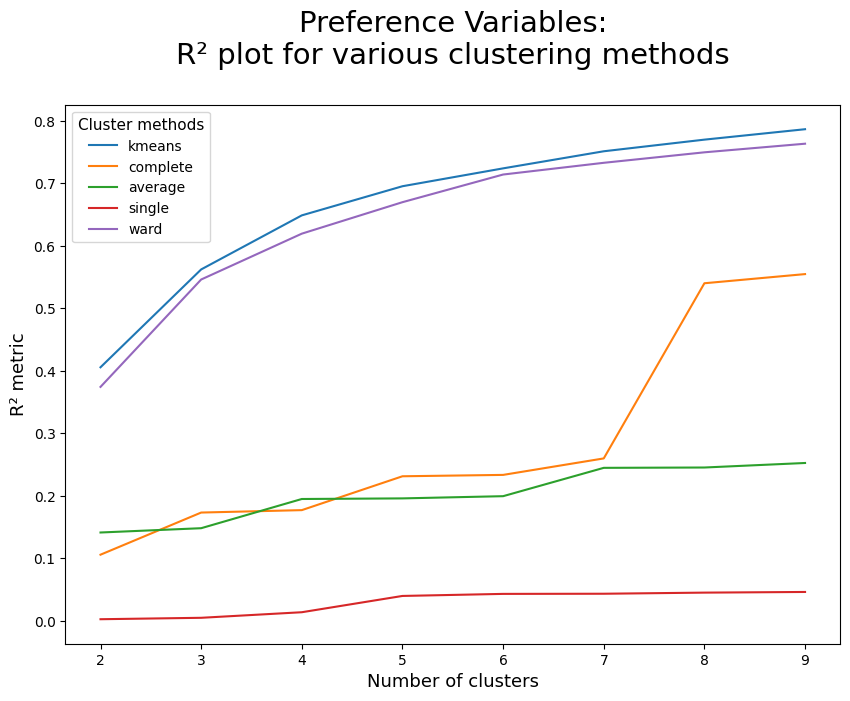

In [17]:
plot_r2_scores(dem_no_r2_scores)

In [18]:
dem_st_r2_scores = get_r2_df(sample_st_scl, demographic_metrics, kmeans, hierarchical)
dem_st_r2_scores

,kmeans,complete,average,single,ward
2,0.530941,0.118446,0.024435,0.025304,0.483200
3,0.618212,0.136652,0.136037,0.025564,0.613755
4,0.688949,0.167714,0.167907,0.029886,0.674768
5,0.723709,0.170686,0.168008,0.092903,0.702292
6,0.741383,0.665984,0.170157,0.162410,0.723596
7,0.754402,0.667747,0.172612,0.163035,0.743706
8,0.770653,0.677874,0.668278,0.163700,0.756801
9,0.782166,0.693904,0.669348,0.163876,0.769406


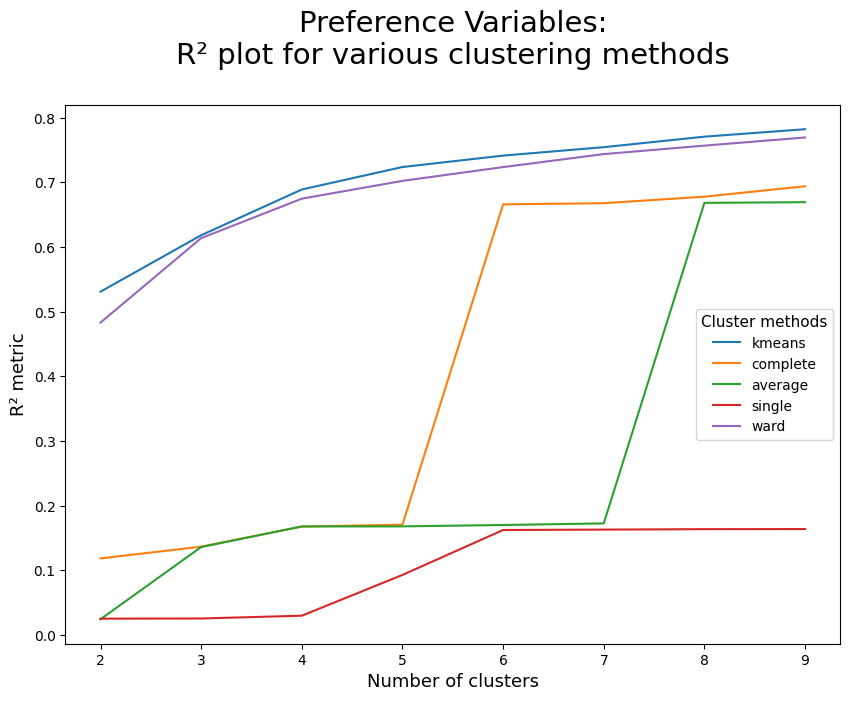

In [19]:
plot_r2_scores(dem_st_r2_scores)

In [20]:
dem_mm_r2_scores = get_r2_df(sample_mm_scl, demographic_metrics, kmeans, hierarchical)
dem_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.530941,0.118446,0.024435,0.025304,0.483200
3,0.618212,0.136652,0.136037,0.025564,0.613755
4,0.688949,0.167714,0.167907,0.029886,0.674768
5,0.723709,0.170686,0.168008,0.092903,0.702292
6,0.741383,0.665984,0.170157,0.162410,0.723596
7,0.754402,0.667747,0.172612,0.163035,0.743706
8,0.770653,0.677874,0.668278,0.163700,0.756801
9,0.782166,0.693904,0.669348,0.163876,0.769406


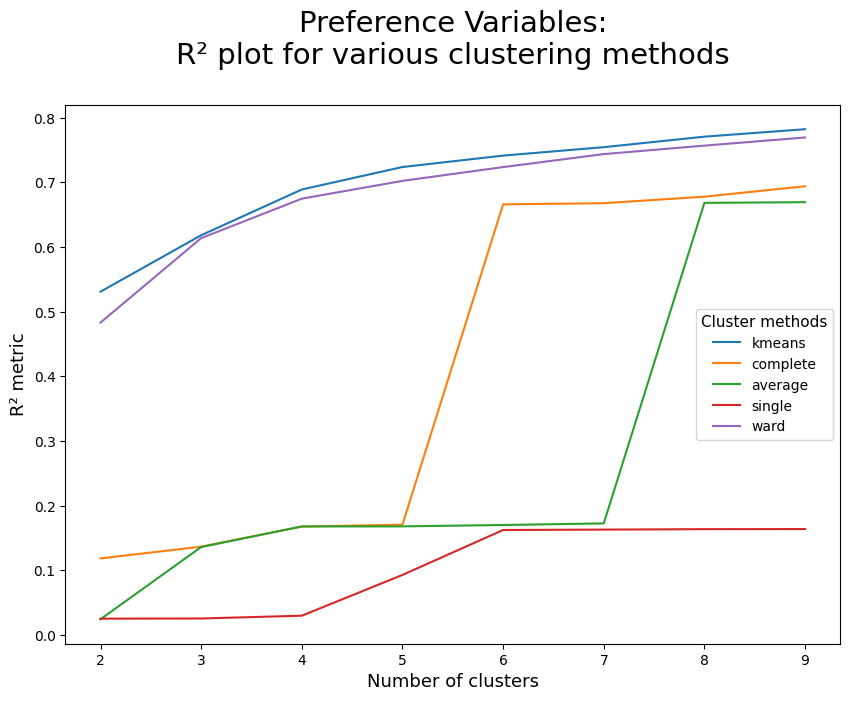

In [21]:
plot_r2_scores(dem_mm_r2_scores)

In [22]:
dem_rb_r2_scores = get_r2_df(sample_rb_scl, demographic_metrics, kmeans, hierarchical)
dem_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.721062,0.433514,0.642145,0.004194,0.681505
3,0.889008,0.854411,0.690575,0.004387,0.883959
4,0.928456,0.869338,0.694764,0.061312,0.922083
5,0.948236,0.901838,0.711787,0.061331,0.944937
6,0.957236,0.906025,0.944439,0.070563,0.955316
7,0.966097,0.907552,0.945855,0.127897,0.964273
8,0.971870,0.908744,0.950875,0.139852,0.969921
9,0.975509,0.916807,0.951382,0.210886,0.973570


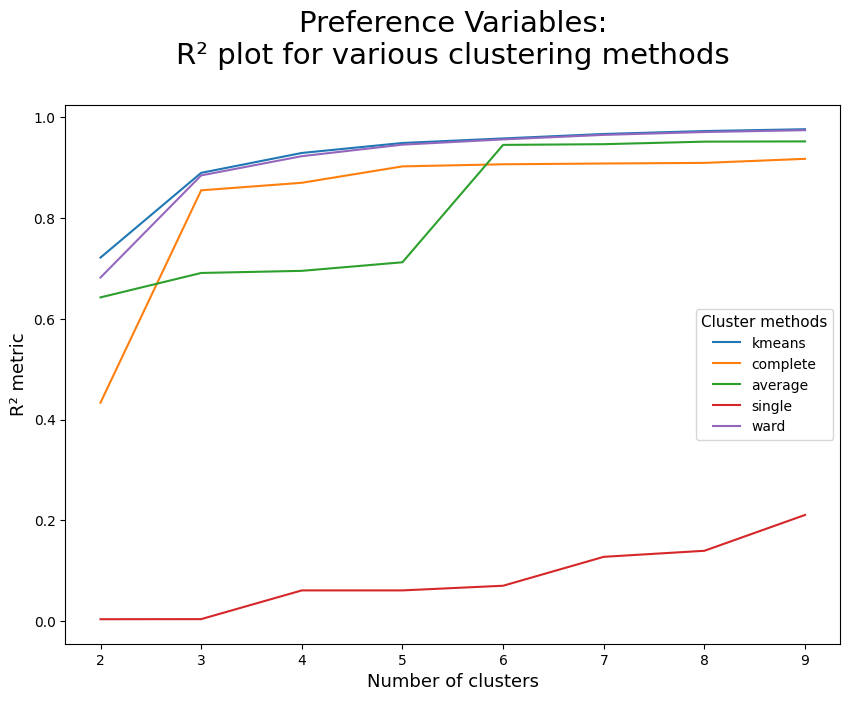

In [23]:
plot_r2_scores(dem_rb_r2_scores)

In [24]:
dem_no_r2_scores_s = get_r2_df(sample_no_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_no_r2_scores_s

,kmeans,complete,average,single,ward
2,0.532964,0.059242,0.000305,0.532964,0.532964
3,0.643101,0.145025,0.048858,0.533190,0.640673
4,0.709202,0.173154,0.564326,0.533353,0.696143
5,0.748136,0.621686,0.565216,0.533581,0.732100
6,0.773744,0.643352,0.626986,0.533732,0.752267
7,0.795207,0.678602,0.628302,0.533869,0.772354
8,0.816675,0.680624,0.628368,0.533977,0.791331
9,0.834314,0.695027,0.633331,0.535553,0.810077


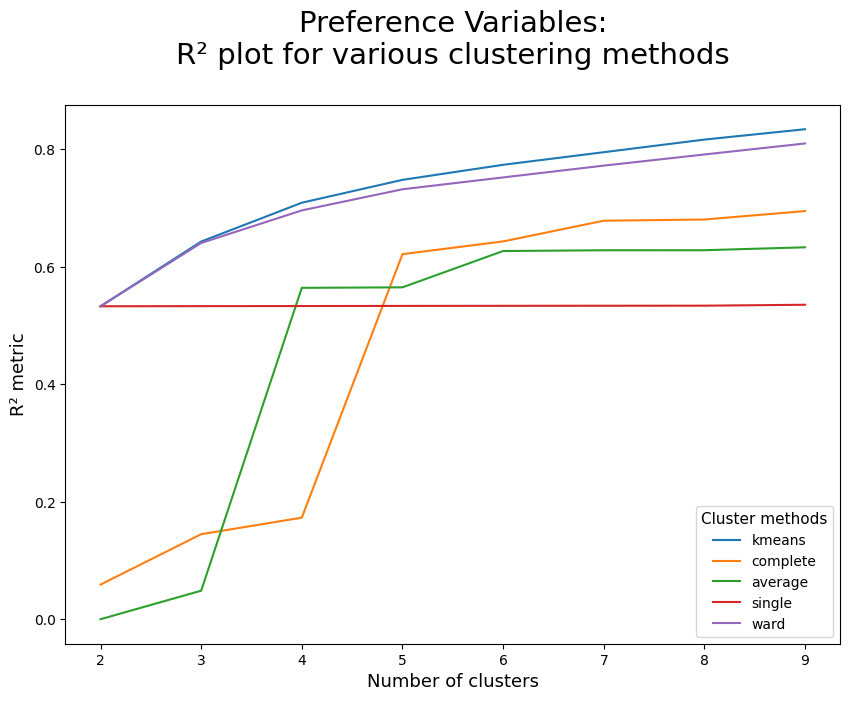

In [25]:
plot_r2_scores(dem_no_r2_scores_s)

In [26]:
dem_st_r2_scores_s = get_r2_df(sample_st_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_st_r2_scores_s

,kmeans,complete,average,single,ward
2,0.399760,0.086917,0.045174,0.000425,0.381507
3,0.504125,0.132093,0.132093,0.045603,0.469539
4,0.582615,0.197994,0.132316,0.132316,0.545007
5,0.632657,0.567796,0.133541,0.133541,0.601451
6,0.678840,0.574892,0.169451,0.138720,0.645422
7,0.707772,0.593010,0.542552,0.145804,0.688166
8,0.744648,0.598188,0.547731,0.531726,0.713585
9,0.769742,0.599324,0.547835,0.531869,0.737540


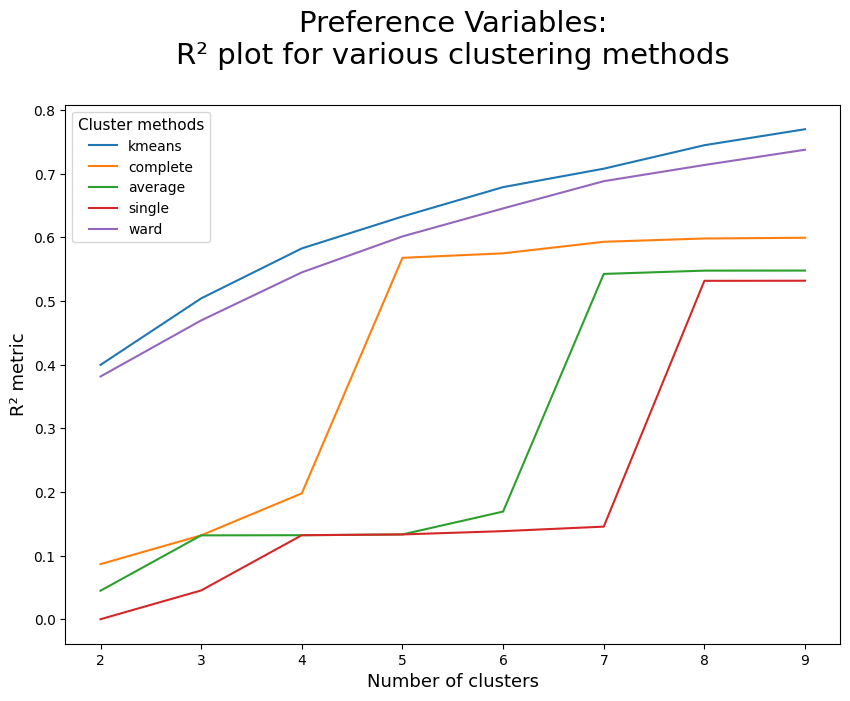

In [27]:
plot_r2_scores(dem_st_r2_scores_s)

In [28]:
dem_mm_r2_scores_s = get_r2_df(sample_mm_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_mm_r2_scores_s

,kmeans,complete,average,single,ward
2,0.399760,0.086917,0.045174,0.000425,0.381507
3,0.504125,0.132093,0.132093,0.045603,0.469539
4,0.582615,0.197994,0.132316,0.132316,0.545007
5,0.632657,0.567796,0.133541,0.133541,0.601451
6,0.678840,0.574892,0.169451,0.138720,0.645422
7,0.707772,0.593010,0.542552,0.145804,0.688166
8,0.744648,0.598188,0.547731,0.531726,0.713585
9,0.769742,0.599324,0.547835,0.531869,0.737540


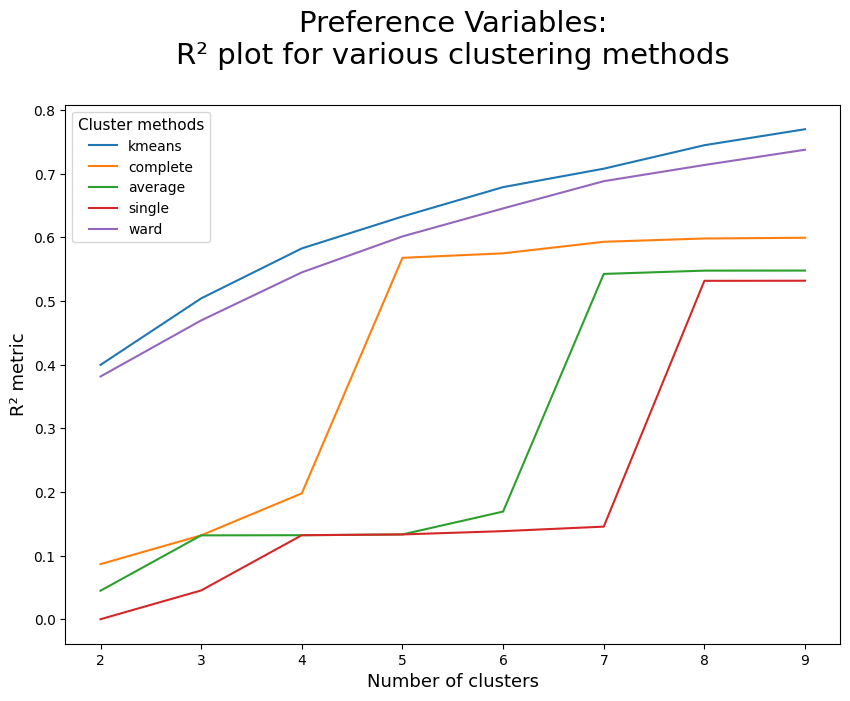

In [29]:
plot_r2_scores(dem_mm_r2_scores_s)

In [30]:
dem_rb_r2_scores_s = get_r2_df(sample_rb_scl, demographic_metrics_selection, kmeans, hierarchical)
dem_rb_r2_scores_s

,kmeans,complete,average,single,ward
2,0.415800,0.180262,0.180262,0.180262,0.414883
3,0.549354,0.532848,0.183041,0.183041,0.571549
4,0.683830,0.533743,0.533743,0.183167,0.683755
5,0.739283,0.675829,0.684724,0.533868,0.739196
6,0.791099,0.722061,0.684850,0.534297,0.781591
7,0.827014,0.728577,0.725801,0.534306,0.816217
8,0.844604,0.733082,0.725855,0.540522,0.831037
9,0.856190,0.733850,0.726680,0.540710,0.843860


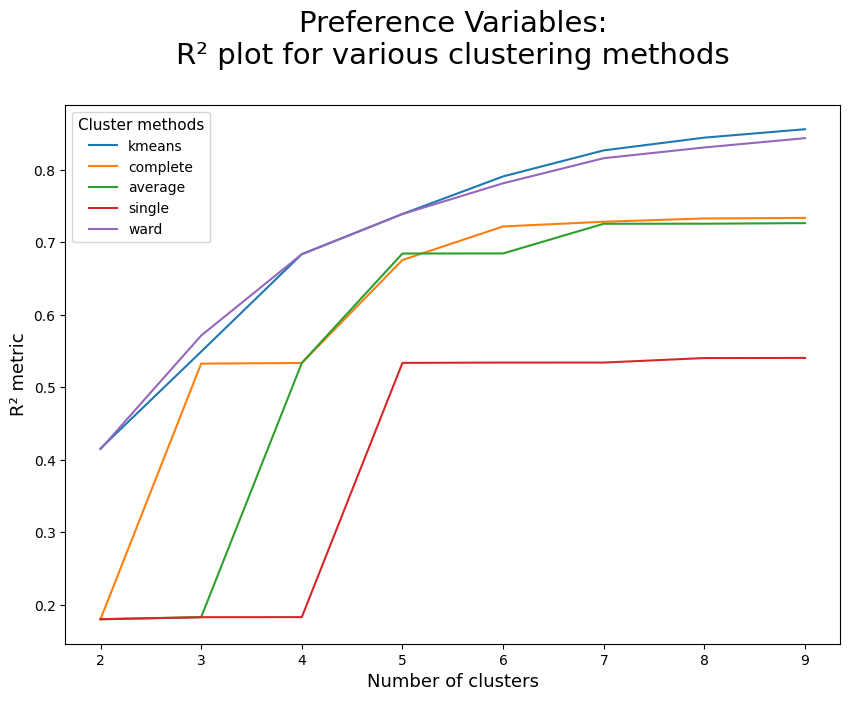

In [31]:
plot_r2_scores(dem_rb_r2_scores_s)

In [32]:
# Prefix the names of the columns
df_no_prefixed = dem_no_r2_scores.add_prefix("no_")
df_st_prefixed = dem_st_r2_scores.add_prefix("st_")
df_mm_prefixed = dem_mm_r2_scores.add_prefix("mm_")
df_rb_prefixed = dem_rb_r2_scores.add_prefix("rb_")

# Concatenate the dataframes
df_combined = pd.concat([df_no_prefixed, df_st_prefixed, df_mm_prefixed, df_rb_prefixed], axis=1)

# Filter ward and kmeans columns
filtered_columns = [col for col in df_combined.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered = df_combined[filtered_columns]
df_filtered

,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.405580,0.374174,0.530941,0.483200,0.530941,0.483200,0.721062,0.681505
3,0.562184,0.546039,0.618212,0.613755,0.618212,0.613755,0.889008,0.883959
4,0.648699,0.619428,0.688949,0.674768,0.688949,0.674768,0.928456,0.922083
5,0.695330,0.669798,0.723709,0.702292,0.723709,0.702292,0.948236,0.944937
6,0.723928,0.714062,0.741383,0.723596,0.741383,0.723596,0.957236,0.955316
7,0.751285,0.732828,0.754402,0.743706,0.754402,0.743706,0.966097,0.964273
8,0.769905,0.749611,0.770653,0.756801,0.770653,0.756801,0.971870,0.969921
9,0.786577,0.763391,0.782166,0.769406,0.782166,0.769406,0.975509,0.973570


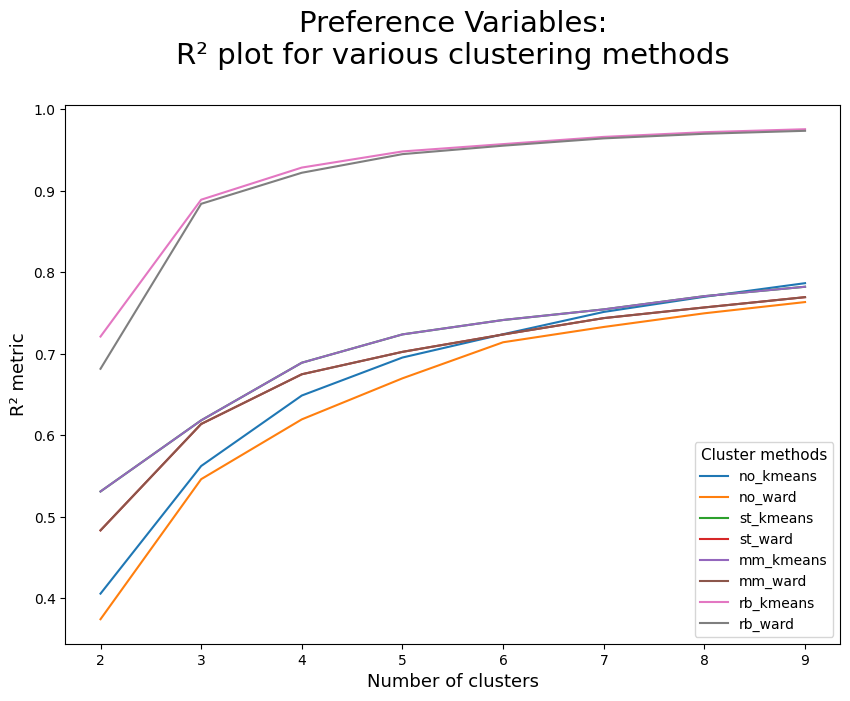

In [33]:
plot_r2_scores(df_filtered)

In [34]:
# Prefix the names of the columns
df_no_prefixed_s = dem_no_r2_scores_s.add_prefix("no_")
df_st_prefixed_s = dem_st_r2_scores_s.add_prefix("st_")
df_mm_prefixed_s = dem_mm_r2_scores_s.add_prefix("mm_")
df_rb_prefixed_s = dem_rb_r2_scores_s.add_prefix("rb_")

# Concatenate the dataframes
df_combined_s = pd.concat([df_no_prefixed_s, df_st_prefixed_s, df_mm_prefixed_s, df_rb_prefixed_s], axis=1)

# Filter ward and kmeans columns
filtered_columns_s = [col for col in df_combined_s.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered_s = df_combined_s[filtered_columns_s]
df_filtered_s

,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.532964,0.532964,0.399760,0.381507,0.399760,0.381507,0.415800,0.414883
3,0.643101,0.640673,0.504125,0.469539,0.504125,0.469539,0.549354,0.571549
4,0.709202,0.696143,0.582615,0.545007,0.582615,0.545007,0.683830,0.683755
5,0.748136,0.732100,0.632657,0.601451,0.632657,0.601451,0.739283,0.739196
6,0.773744,0.752267,0.678840,0.645422,0.678840,0.645422,0.791099,0.781591
7,0.795207,0.772354,0.707772,0.688166,0.707772,0.688166,0.827014,0.816217
8,0.816675,0.791331,0.744648,0.713585,0.744648,0.713585,0.844604,0.831037
9,0.834314,0.810077,0.769742,0.737540,0.769742,0.737540,0.856190,0.843860


In [36]:
df_filtered_s.columns

Index(['no_kmeans', 'no_ward', 'st_kmeans', 'st_ward', 'mm_kmeans', 'mm_ward',
       'rb_kmeans', 'rb_ward'],
      dtype='object')

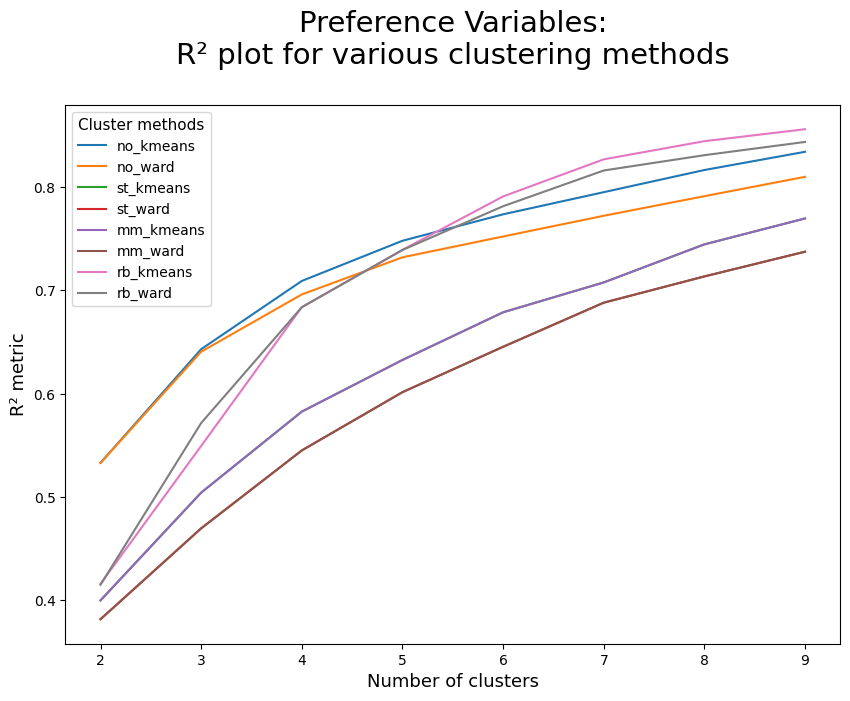

In [39]:
plot_r2_scores(df_filtered_s)

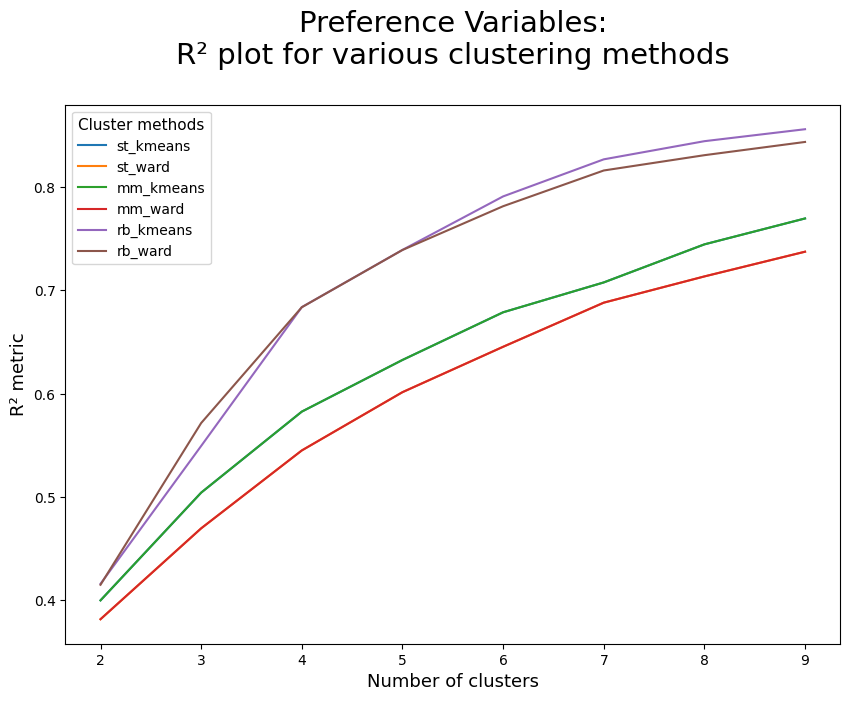

In [ ]:
plot_r2_scores(df_filtered_s[['st_kmeans', 'st_ward', 'mm_kmeans', 'mm_ward',
       'rb_kmeans', 'rb_ward']])

In [41]:
demographic

,frequency_items,potencial_score,zip_code,longevity_months,credit_factor,recency_in_weeks,returns,flaged,promotional_percentage,relevance_criteria_Priority,relevance_criteria_Unknown
0,38,-0.40,0,23,0.7,15,0,0,20,1.0,0.0
1,50,-0.30,0,24,0.7,10,0,0,36,1.0,0.0
2,48,1.60,0,32,0.7,20,0,0,0,1.0,0.0
3,46,-0.90,0,12,4.5,14,0,0,36,1.0,0.0
4,31,31.61,8,10,0.7,12,0,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
122124,51,0.10,0,25,0.7,9,6,0,0,1.0,0.0
122125,42,30.99,8,23,0.7,15,0,0,0,1.0,0.0
122126,24,79.76,8,29,0.7,13,0,0,13,1.0,0.0
122127,29,0.50,0,14,0.7,11,0,0,0,1.0,0.0


---

# 4. Clustering
<a id='cl'></a>

In the notebook, the cluster analysis is grouped by data inputs - no scaling, standard scaler, minmax scaler, robust scaler. In each group, *n* methods of clustering were used and they are presented in this order:
1. [KMeans](#km)
2. [Ward (Hierarchical)](#wh)
3. [DBScan](#dbs)

In the end, it was possible to identify groups that recurrently appeared in the clustering solutions, and based on this, *x* solutions were chosen to be further studied.

## 4.1. K-means <a id='km'></a>

In this section, the k-means algorithm was tested with the data inputs previously mentioned. For each of the data inputs inertia and silhuette plots were done in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#km-no)
2. [Standard Scaler](#km-st)
3. [MinMax Scaler](#km-mm)
4. [Robust Scaler](#km-rb)

### No Scaler <a id='km-no'></a>

#### Plot

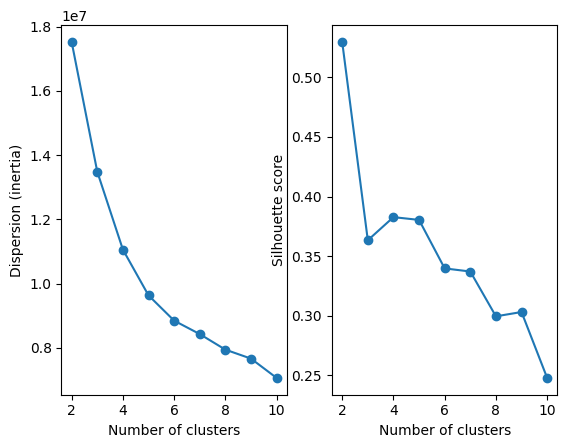

In [22]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

#### Models

In [23]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans3'] = kmeans.predict(sample_no_scl)

In [24]:
groupby_mean(sample_original, 'no_kmeans3', True)

# observations per cluster: [8304, 5744, 10378]


no_kmeans3,0,1,2
frequency_items,35.030000,40.520000,39.400000
potencial_score,29.740000,80.200000,0.730000
longevity_months,16.500000,16.530000,12.940000
relevance_criteria,1.930000,1.910000,1.920000
recency_in_weeks,15.140000,14.780000,15.640000
promotional_percentage,10.290000,12.800000,11.740000
returns,0.030000,0.070000,0.040000
flaged,0.010000,0.020000,0.010000
credit_factor,0.830000,0.800000,1.020000
zip_code,7.660000,7.680000,0.570000


##### 4 clusters

In [25]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans4'] = kmeans.predict(sample_no_scl)

In [26]:
groupby_mean(sample_original, 'no_kmeans4', True)

# observations per cluster: [9913, 5531, 7694, 1288]


no_kmeans4,0,1,2,3
frequency_items,39.290000,40.490000,35.090000,38.110000
potencial_score,0.680000,80.200000,29.730000,28.000000
longevity_months,12.890000,16.480000,16.480000,15.950000
relevance_criteria,1.920000,1.910000,1.930000,2.000000
recency_in_weeks,15.660000,14.800000,15.160000,14.930000
promotional_percentage,9.330000,10.100000,7.010000,60.970000
returns,0.030000,0.050000,0.020000,0.250000
flaged,0.010000,0.020000,0.010000,0.000000
credit_factor,1.020000,0.800000,0.820000,1.000000
zip_code,0.540000,7.680000,7.670000,5.270000


In [27]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans5'] = kmeans.predict(sample_no_scl)

In [28]:
groupby_mean(sample_original, 'no_kmeans5', True)

# observations per cluster: [8362, 7531, 5075, 2737, 721]


no_kmeans5,0,1,2,3,4
frequency_items,39.570000,34.860000,40.550000,38.200000,39.740000
potencial_score,0.770000,29.970000,80.180000,7.490000,77.120000
longevity_months,13.340000,16.540000,16.420000,12.540000,17.320000
relevance_criteria,1.900000,1.930000,1.900000,2.000000,2.000000
recency_in_weeks,15.570000,15.140000,14.810000,15.770000,14.440000
promotional_percentage,5.280000,6.760000,7.020000,39.350000,58.820000
returns,0.030000,0.020000,0.050000,0.070000,0.260000
flaged,0.010000,0.010000,0.020000,0.000000,0.000000
credit_factor,0.800000,0.810000,0.790000,1.710000,0.900000
zip_code,0.620000,7.680000,7.680000,2.260000,7.660000


##### 6 clusters

In [51]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans6'] = kmeans.predict(sample_no_scl)

In [52]:
groupby_mean(sample_original, 'no_kmeans6', True)

# observations per cluster: [180, 7383, 8163, 5420, 2683, 597]


no_kmeans6,0,1,2,3,4,5
frequency_items,36.990000,34.860000,39.510000,40.600000,38.200000,39.200000
potencial_score,43.430000,29.960000,0.750000,80.210000,7.730000,41.020000
longevity_months,16.230000,16.440000,13.330000,16.480000,12.630000,16.690000
relevance_criteria,1.790000,1.930000,1.900000,1.920000,2.000000,1.890000
recency_in_weeks,14.620000,15.150000,15.590000,14.830000,15.750000,14.420000
promotional_percentage,8.690000,6.720000,5.300000,11.480000,38.430000,35.170000
returns,194.840000,0.070000,0.310000,0.540000,0.790000,76.640000
flaged,0.140000,0.000000,0.000000,0.010000,0.000000,0.080000
credit_factor,1.040000,0.800000,0.790000,0.800000,1.720000,0.960000
zip_code,5.580000,7.680000,0.600000,7.670000,2.300000,5.630000


In [53]:
data.columns

Index(['id_client', 'frequency_items', 'potencial_score', 'zip_code',
       'longevity_months', 'credit_factor', 'relevance_criteria',
       'recency_in_weeks', 'returns', 'gender', 'flaged',
       'promotional_percentage', 'education', 'beer', 'bottled_water', 'bread',
       'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages',
       'pastry', 'sodas', 'toiletries', 'veggies', 'wines', 'percentage_beer',
       'percentage_bottled_water', 'percentage_bread', 'percentage_meat',
       'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods',
       'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas',
       'percentage_toiletries', 'percentage_veggies', 'percentage_wines'],
      dtype='object')

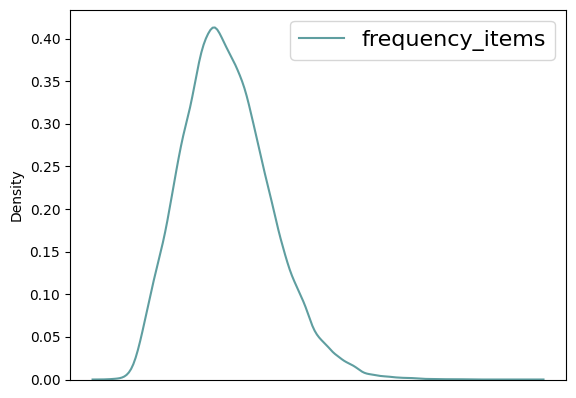

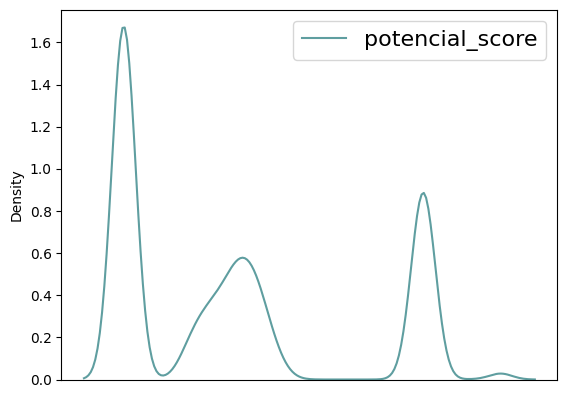

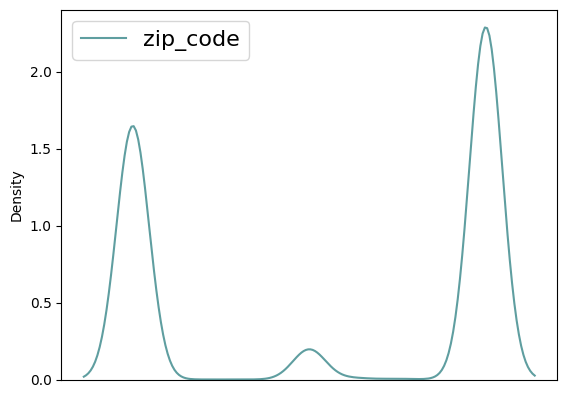

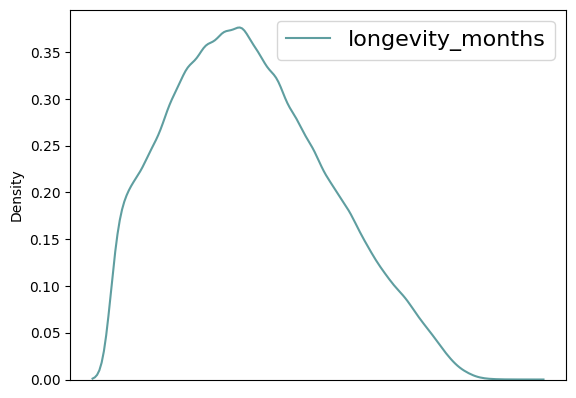

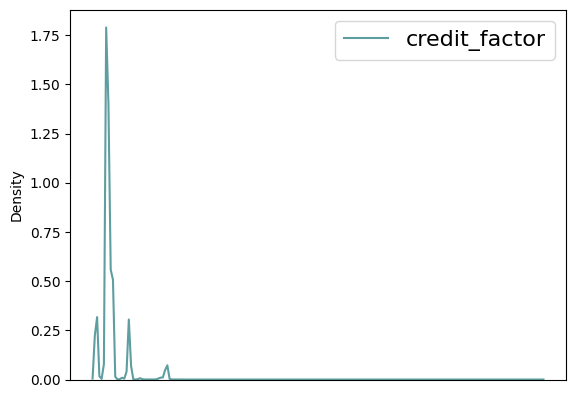

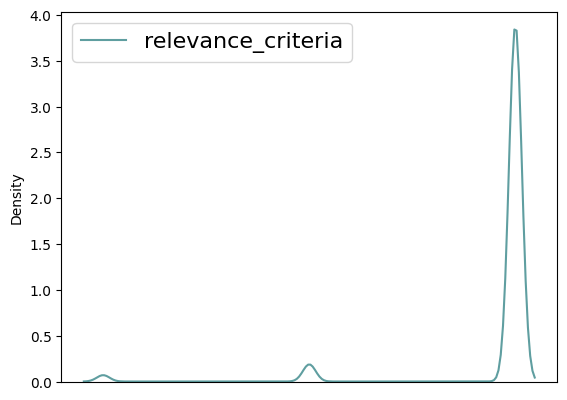

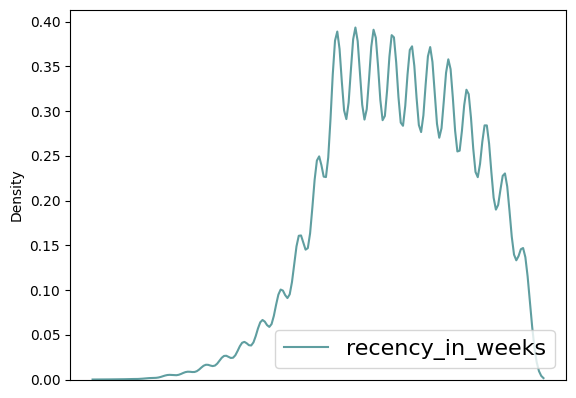

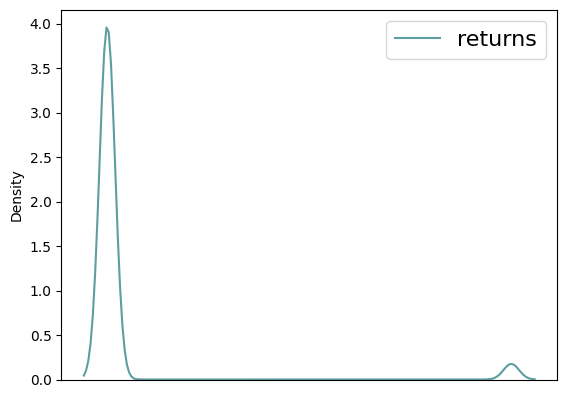

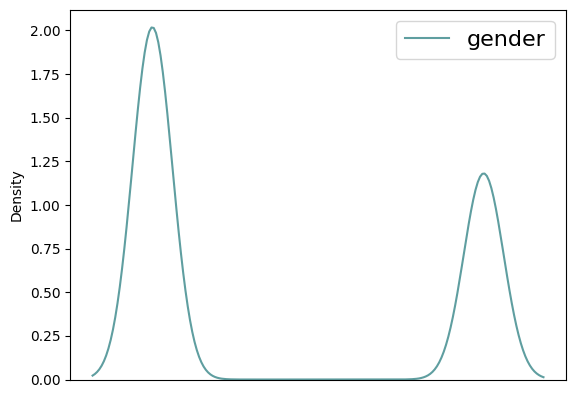

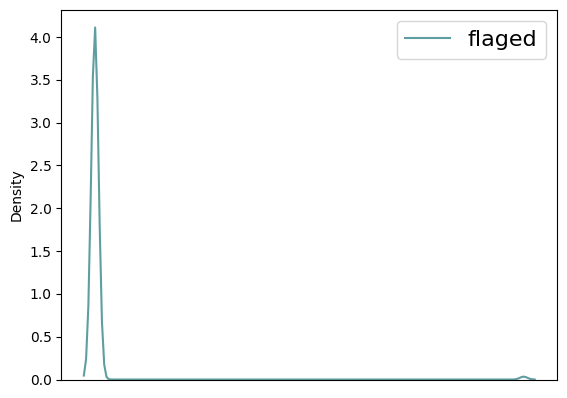

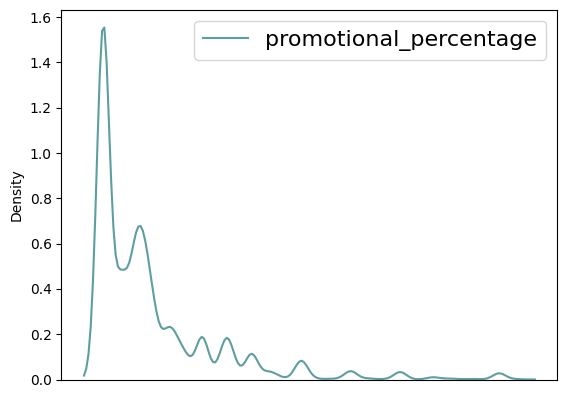

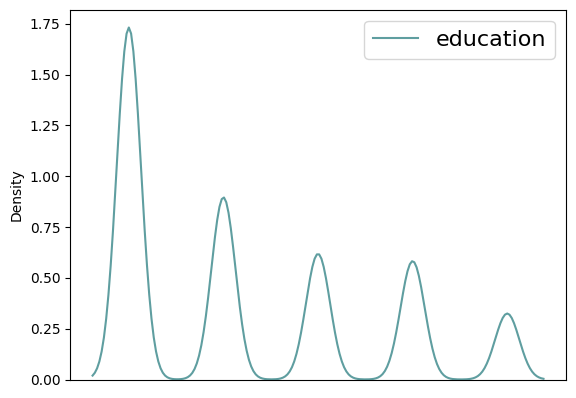

In [56]:
# from utils1 import plot_distributions
for col in ['frequency_items', 'potencial_score', 'zip_code',
       'longevity_months', 'credit_factor', 'relevance_criteria',
       'recency_in_weeks', 'returns', 'gender', 'flaged',
       'promotional_percentage', 'education']:
    plot_distributions(data, [col], ['cadetblue'], False)

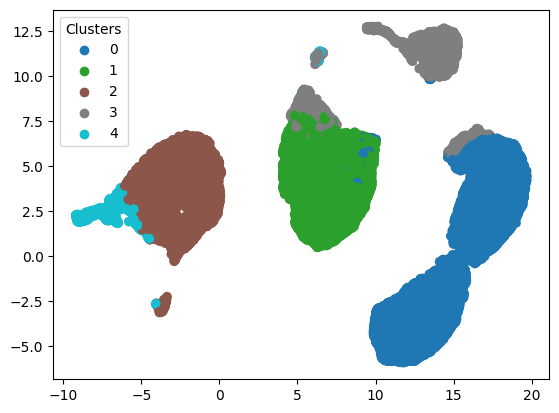

In [39]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['no_kmeans5'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_kmeans3')

,no_kmeans3 0 Cluster,no_kmeans3 1 Cluster,no_kmeans3 2 Cluster
no_kmeans4 0 Cluster,3765,100,4
no_kmeans4 1 Cluster,2,7848,0
no_kmeans4 2 Cluster,5021,0,22
no_kmeans4 3 Cluster,5,1,7658


In [ ]:
clusters_comparison(sample_original, 'no_kmeans6', 'no_kmeans4')

,no_kmeans4 0 Cluster,no_kmeans4 1 Cluster,no_kmeans4 2 Cluster,no_kmeans4 3 Cluster
no_kmeans6 0 Cluster,3,18,29,2228
no_kmeans6 1 Cluster,30,7806,0,0
no_kmeans6 2 Cluster,15,0,3253,0
no_kmeans6 3 Cluster,3733,2,1758,4
no_kmeans6 4 Cluster,87,14,1,11
no_kmeans6 5 Cluster,1,10,2,5421


### Standard Scaler <a id='km-st'></a>

#### Plot

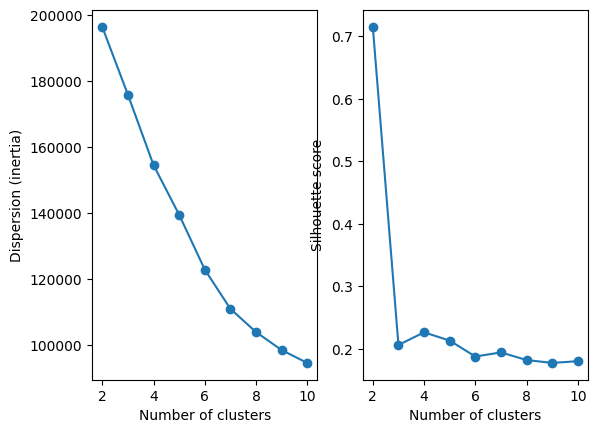

In [77]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

#### Models

##### 3 clusters

In [ ]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans3'] = kmeans.predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_kmeans3', True)

##### 4 clusters

In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans4'] = kmeans.predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_kmeans4', True)

##### 7 clusters

In [ ]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans7'] = kmeans.predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_kmeans7', True)

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_kmeans3')

,st_kmeans3 0 Cluster,st_kmeans3 1 Cluster,st_kmeans3 2 Cluster
st_kmeans4 0 Cluster,7836,0,0
st_kmeans4 1 Cluster,0,1,7750
st_kmeans4 2 Cluster,0,8767,0
st_kmeans4 3 Cluster,22,38,12


In [ ]:
clusters_comparison(sample_original, 'st_kmeans7', 'st_kmeans4')

,st_kmeans4 0 Cluster,st_kmeans4 1 Cluster,st_kmeans4 2 Cluster,st_kmeans4 3 Cluster
st_kmeans7 0 Cluster,7,955,3289,0
st_kmeans7 1 Cluster,7793,5,0,1
st_kmeans7 2 Cluster,14,9,5458,1
st_kmeans7 3 Cluster,2,4268,0,0
st_kmeans7 4 Cluster,15,2506,19,0
st_kmeans7 5 Cluster,0,0,0,39
st_kmeans7 6 Cluster,5,8,1,31


### MinMax Scaler <a id='km-mm'></a>

#### Plot

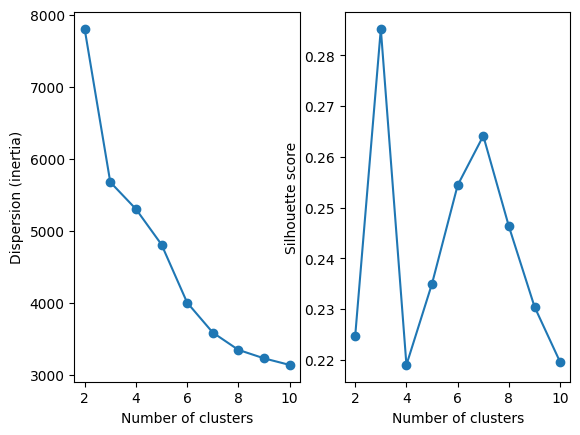

In [40]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

#### Models

##### 3 clusters

In [49]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans3'] = kmeans.predict(sample_mm_scl)

In [50]:
groupby_mean(sample_original, 'mm_kmeans3', True)

# observations per cluster: [7718, 5428, 11280]


mm_kmeans3,0,1,2
frequency_items,36.760000,40.620000,37.970000
potencial_score,13.790000,80.230000,15.360000
longevity_months,10.370000,16.900000,17.240000
relevance_criteria,2.000000,1.910000,1.880000
recency_in_weeks,15.660000,14.760000,15.250000
promotional_percentage,12.890000,12.590000,10.020000
returns,0.020000,0.070000,0.040000
flaged,0.000000,0.020000,0.010000
credit_factor,0.790000,0.800000,1.030000
zip_code,3.120000,7.670000,4.250000


##### 4 clusters

In [51]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans4'] = kmeans.predict(sample_mm_scl)

In [52]:
groupby_mean(sample_original, 'mm_kmeans4', True, ax=1)

# observations per cluster: [10810, 7563, 5028, 1025]


mm_kmeans4,0,1,2,3
frequency_items,37.900000,36.720000,40.650000,39.690000
potencial_score,15.480000,13.760000,80.250000,39.260000
longevity_months,17.220000,10.380000,16.870000,16.380000
relevance_criteria,1.880000,2.000000,1.910000,1.880000
recency_in_weeks,15.270000,15.660000,14.820000,14.570000
promotional_percentage,9.380000,12.430000,11.120000,28.740000
returns,0.000000,0.000000,0.000000,1.000000
flaged,0.010000,0.000000,0.010000,0.080000
credit_factor,1.030000,0.790000,0.800000,0.970000
zip_code,4.270000,3.120000,7.660000,5.300000


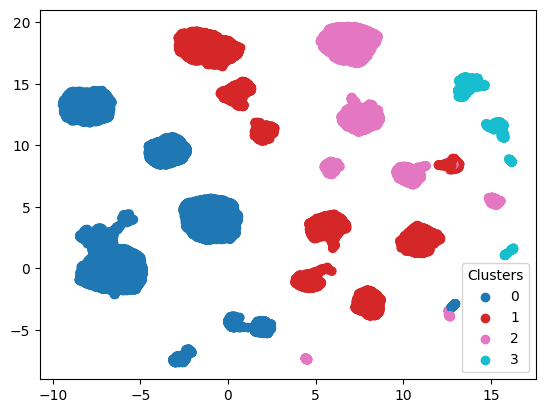

In [45]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_kmeans4'])

##### 5 clusters

In [81]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans5'] = kmeans.predict(sample_mm_scl)

In [ ]:
groupby_mean(sample_original, 'mm_kmeans5', True)

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_kmeans3')

,mm_kmeans3 0 Cluster,mm_kmeans3 1 Cluster,mm_kmeans3 2 Cluster
mm_kmeans4 0 Cluster,5171,1,60
mm_kmeans4 1 Cluster,0,7828,0
mm_kmeans4 2 Cluster,3,0,8720
mm_kmeans4 3 Cluster,2609,13,21


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_kmeans4')

,mm_kmeans4 0 Cluster,mm_kmeans4 1 Cluster,mm_kmeans4 2 Cluster,mm_kmeans4 3 Cluster
mm_kmeans5 0 Cluster,799,2,3119,14
mm_kmeans5 1 Cluster,0,7825,0,0
mm_kmeans5 2 Cluster,4399,0,0,30
mm_kmeans5 3 Cluster,28,0,0,2591
mm_kmeans5 4 Cluster,6,1,5604,8


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans6', 'mm_kmeans5')

,mm_kmeans5 0 Cluster,mm_kmeans5 1 Cluster,mm_kmeans5 2 Cluster,mm_kmeans5 3 Cluster,mm_kmeans5 4 Cluster
mm_kmeans6 0 Cluster,1,1,0,0,5617
mm_kmeans6 1 Cluster,1,4067,1,0,0
mm_kmeans6 2 Cluster,0,3757,2,3,2
mm_kmeans6 3 Cluster,0,0,0,2616,0
mm_kmeans6 4 Cluster,0,0,4426,0,0
mm_kmeans6 5 Cluster,3932,0,0,0,0


### Robust Scaler <a id='km-rb'></a>

#### Plot

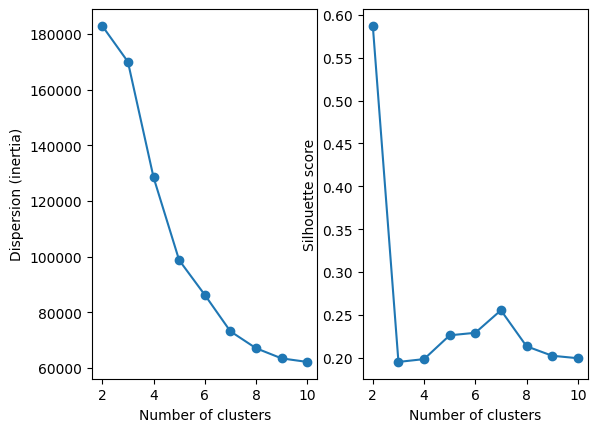

In [46]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

#### Models

##### 3 clusters

In [47]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans3'] = kmeans.predict(sample_rb_scl)

In [48]:
groupby_mean(sample_original, 'rb_kmeans3', True)

# observations per cluster: [21924, 6, 2496]


rb_kmeans3,0,1,2
frequency_items,38.170000,37.170000,38.250000
potencial_score,30.320000,0.980000,20.210000
longevity_months,15.160000,14.500000,13.550000
relevance_criteria,1.920000,2.000000,1.970000
recency_in_weeks,15.160000,15.000000,16.200000
promotional_percentage,10.230000,0.000000,22.660000
returns,0.040000,0.000000,0.040000
flaged,0.010000,0.000000,0.000000
credit_factor,0.690000,27.700000,2.720000
zip_code,4.820000,0.000000,3.190000


general(beer+water+frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas))

##### 5 clusters

In [ ]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans5'] = kmeans.predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_kmeans5', True)

# observations per cluster: [967, 4212, 5602, 44, 13601]


rb_kmeans5,0,1,2,3,4
beer,53.190000,45.120000,46.230000,110.200000,67.810000
bottled_water,49.090000,44.750000,45.120000,56.800000,66.960000
bread,31.070000,14.910000,30.040000,305.800000,30.280000
meat,4.780000,1.160000,1.990000,184.020000,1.880000
dairy,82.010000,83.930000,43.290000,112.070000,32.920000
fresh_foods,48.110000,32.710000,77.320000,173.200000,63.030000
frozen_foods,49.700000,32.420000,35.490000,192.300000,98.010000
fruit_beverages,31.390000,21.110000,64.970000,123.430000,50.840000
pastry,34.310000,30.670000,114.460000,57.480000,30.590000
sodas,43.160000,33.400000,34.620000,241.980000,33.720000


veggies+dairy+wines | dairy | pastry+(fresh+beverage) | spenders(bread+(sodas)) | beer+water+frozen+(fresh+beverage)

##### 6 clusters

In [ ]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans6'] = kmeans.predict(sample_rb_scl)

In [ ]:
groupby_mean(sample_original, 'rb_kmeans6', True)

# observations per cluster: [4250, 8116, 5472, 5593, 44, 951]


rb_kmeans6,0,1,2,3,4,5
beer,45.130000,82.890000,45.640000,46.220000,110.200000,52.550000
bottled_water,44.750000,82.000000,44.760000,45.120000,56.800000,48.830000
bread,15.060000,30.210000,30.400000,30.040000,305.800000,30.990000
meat,1.210000,1.560000,2.340000,1.990000,184.020000,4.730000
dairy,84.190000,33.390000,31.650000,43.310000,112.070000,82.850000
fresh_foods,32.330000,33.410000,107.650000,77.270000,173.200000,47.210000
frozen_foods,32.450000,107.600000,84.240000,35.430000,192.300000,48.560000
fruit_beverages,20.790000,21.270000,95.350000,64.890000,123.430000,30.510000
pastry,30.660000,30.580000,30.680000,114.520000,57.480000,34.360000
sodas,33.440000,33.320000,34.340000,34.600000,241.980000,43.110000


dairy | beer+water+frozen | fresh+beverage+(frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas)) | veggies+dairy+wines

### Comparison

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans5', 'rb_kmeans3')

,rb_kmeans3 0 Cluster,rb_kmeans3 1 Cluster,rb_kmeans3 2 Cluster
rb_kmeans5 0 Cluster,934,31,2
rb_kmeans5 1 Cluster,4208,4,0
rb_kmeans5 2 Cluster,2,5600,0
rb_kmeans5 3 Cluster,0,0,44
rb_kmeans5 4 Cluster,13599,1,1


In [ ]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_kmeans5')

,rb_kmeans5 0 Cluster,rb_kmeans5 1 Cluster,rb_kmeans5 2 Cluster,rb_kmeans5 3 Cluster,rb_kmeans5 4 Cluster
rb_kmeans6 0 Cluster,0,4188,0,0,62
rb_kmeans6 1 Cluster,9,3,1,0,8103
rb_kmeans6 2 Cluster,9,21,8,0,5434
rb_kmeans6 3 Cluster,0,0,5593,0,0
rb_kmeans6 4 Cluster,0,0,0,44,0
rb_kmeans6 5 Cluster,949,0,0,0,2


## 4.2. Hierarchical (Ward) <a id='wh'></a>

In this section, the hierarchical algorithm with a ward linkeage method was tested with the data inputs previously mentioned. For each of the data inputs dendrograms were plotted in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#h-no)
2. [Standard Scaler](#h-st)
3. [MinMax Scaler](#h-mm)
4. [Robust Scaler](#h-rb)

In the end of this section there is also a result comparison between clustering techniques as well as scaling options.

5. [Inter Clustering Comparison](#icc)

### No Scaler <a id='h-no'></a>

#### Plot

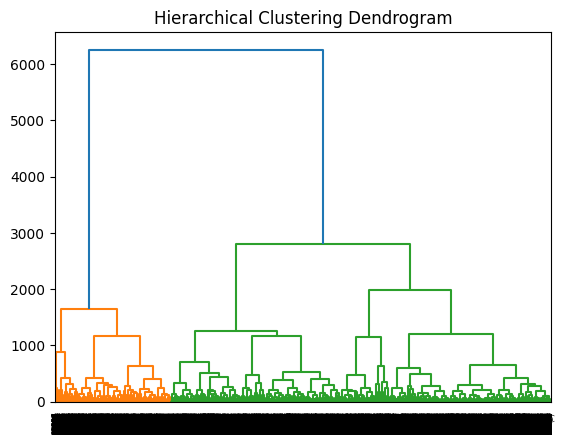

In [17]:
plot_dendrogram(sample_no_scl, 'ward')

#### Models

In [18]:
sample_original['no_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_no_scl)

In [19]:
groupby_mean(sample_original, 'no_ward2', True, 12, 0)

# observations per cluster: [18682, 5744]


no_ward2,0,1
frequency_items,37.460000,40.520000
potencial_score,13.620000,80.200000
longevity_months,14.520000,16.530000
relevance_criteria,1.930000,1.910000
recency_in_weeks,15.420000,14.780000
promotional_percentage,11.100000,12.800000
returns,2.770000,6.480000
flaged,0.010000,0.020000
credit_factor,0.940000,0.800000
zip_code,3.720000,7.680000


score | general

##### 3 clusters

In [20]:
sample_original['no_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_no_scl)

In [21]:
groupby_mean(sample_original, 'no_ward3', True, 12)

# observations per cluster: [10395, 5744, 8287]


no_ward3,0,1,2
frequency_items,39.130000,40.520000,35.360000
potencial_score,0.930000,80.200000,29.550000
longevity_months,13.000000,16.530000,16.440000
relevance_criteria,1.920000,1.910000,1.930000
recency_in_weeks,15.630000,14.780000,15.160000
promotional_percentage,12.600000,12.800000,9.210000
returns,3.210000,6.480000,2.210000
flaged,0.010000,0.020000,0.010000
credit_factor,1.020000,0.800000,0.830000
zip_code,0.580000,7.680000,7.660000


##### 5 clusters

In [24]:
sample_original['no_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_no_scl)

In [25]:
groupby_mean(sample_original, 'no_ward4', True, 12, 0)

# observations per cluster: [5744, 7961, 8287, 2434]


no_ward4,0,1,2,3
frequency_items,40.520000,39.200000,35.360000,38.900000
potencial_score,80.200000,0.500000,29.550000,2.310000
longevity_months,16.530000,13.560000,16.440000,11.150000
relevance_criteria,1.910000,1.900000,1.930000,2.000000
recency_in_weeks,14.780000,15.590000,15.160000,15.770000
promotional_percentage,12.800000,5.010000,9.210000,37.440000
returns,6.480000,2.630000,2.210000,5.100000
flaged,0.020000,0.010000,0.010000,0.000000
credit_factor,0.800000,0.810000,0.830000,1.700000
zip_code,7.680000,0.520000,7.660000,0.790000


In [22]:
sample_original['no_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_no_scl)

In [23]:
groupby_mean(sample_original, 'no_ward5', True, 12, 0)

# observations per cluster: [8287, 7961, 4647, 2434, 1097]


no_ward5,0,1,2,3,4
frequency_items,35.360000,39.200000,41.020000,38.900000,38.370000
potencial_score,29.550000,0.500000,80.140000,2.310000,80.440000
longevity_months,16.440000,13.560000,16.530000,11.150000,16.540000
relevance_criteria,1.930000,1.900000,1.890000,2.000000,2.000000
recency_in_weeks,15.160000,15.590000,14.790000,15.770000,14.710000
promotional_percentage,9.210000,5.010000,5.310000,37.440000,44.520000
returns,2.210000,2.630000,5.600000,5.100000,10.210000
flaged,0.010000,0.010000,0.020000,0.000000,0.000000
credit_factor,0.830000,0.810000,0.770000,1.700000,0.960000
zip_code,7.660000,0.520000,7.690000,0.790000,7.620000


normal | lowscore+nopromo? | score | promo | score+promo+return

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'no_ward3', 'no_ward2')

In [ ]:
clusters_comparison(sample_original, 'no_ward4', 'no_ward3')

In [80]:
sample_no_scl

,frequency_items,potencial_score,longevity_months,relevance_criteria,recency_in_weeks,promotional_percentage
66395,25,2.00,16,2,22,8
120600,18,80.54,15,2,11,40
113930,44,18.45,4,1,16,0
100386,61,0.80,21,2,17,8
111648,20,79.66,18,2,18,0
...,...,...,...,...,...,...
12860,40,0.20,15,2,20,10
23685,14,16.43,23,2,15,0
80790,52,-0.70,2,2,14,20
98891,20,0.90,17,2,18,12


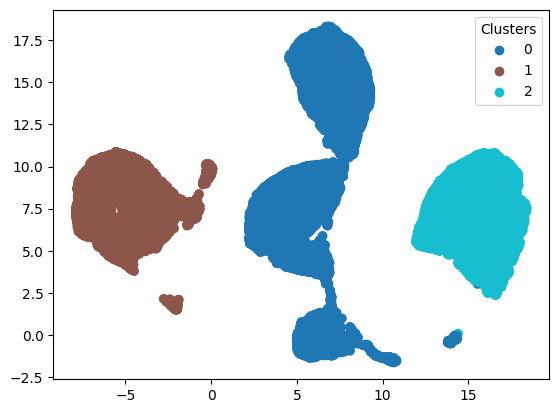

In [31]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['no_ward3'])

### Standard Scaler <a id='h-st'></a>

#### Plot

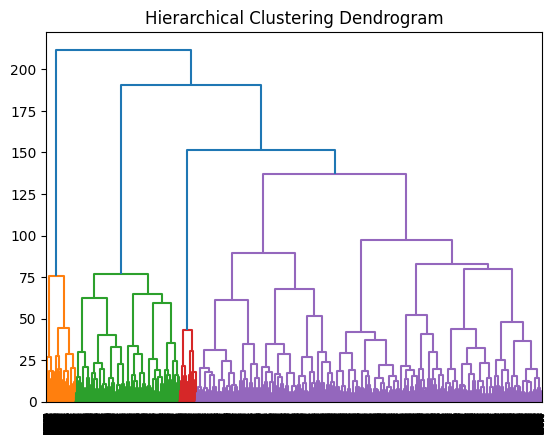

In [32]:
plot_dendrogram(sample_st_scl, 'ward')

#### Models

##### 3 clusters

In [33]:
sample_original['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_st_scl)

In [34]:
groupby_mean(sample_original, 'st_ward3', True)

# observations per cluster: [17846, 1476, 5104]


st_ward3,0,1,2
frequency_items,37.440000,39.260000,40.420000
potencial_score,14.510000,31.880000,80.150000
longevity_months,14.550000,15.290000,16.480000
relevance_criteria,2.000000,0.720000,2.000000
recency_in_weeks,15.400000,15.470000,14.770000
promotional_percentage,12.640000,0.090000,10.800000
returns,3.010000,8.590000,4.410000
flaged,0.000000,0.110000,0.000000
credit_factor,0.950000,0.660000,0.810000
zip_code,3.790000,4.700000,7.670000


general | nopromo | score

##### 4 clusters

In [35]:
sample_original['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_st_scl)

In [41]:
groupby_mean(sample_original, 'st_ward4', True, 12)

# observations per cluster: [17029, 1476, 5104, 817]


st_ward4,0,1,2,3
frequency_items,37.340000,39.260000,40.420000,39.570000
potencial_score,13.690000,31.880000,80.150000,31.760000
longevity_months,14.510000,15.290000,16.480000,15.240000
relevance_criteria,2.000000,0.720000,2.000000,2.000000
recency_in_weeks,15.400000,15.470000,14.770000,15.360000
promotional_percentage,9.830000,0.090000,10.800000,71.180000
returns,2.170000,8.590000,4.410000,20.450000
flaged,0.000000,0.110000,0.000000,0.000000
credit_factor,0.950000,0.660000,0.810000,1.020000
zip_code,3.740000,4.700000,7.670000,4.760000


general | nopromo | score | promo+returns

##### 5 clusters

In [37]:
sample_original['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_st_scl)

In [ ]:
groupby_mean(sample_original, 'st_ward5', True, 12)

# observations per cluster: [10239, 6790, 5104, 817, 1476]


st_ward5,0,1,2,3,4
frequency_items,36.960000,37.920000,40.420000,39.570000,39.260000
potencial_score,11.180000,17.470000,80.150000,31.760000,31.880000
longevity_months,9.360000,22.290000,16.480000,15.240000,15.290000
relevance_criteria,2.000000,2.000000,2.000000,2.000000,0.720000
recency_in_weeks,15.200000,15.700000,14.770000,15.360000,15.470000
promotional_percentage,10.910000,8.200000,10.800000,71.180000,0.090000
returns,1.900000,2.590000,4.410000,20.450000,8.590000
flaged,0.000000,0.000000,0.000000,0.000000,0.110000
credit_factor,0.980000,0.910000,0.810000,1.020000,0.660000
zip_code,3.050000,4.780000,7.670000,4.760000,4.700000


general | antiques | score | promo | nopromo

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'st_ward6', 'st_ward3')

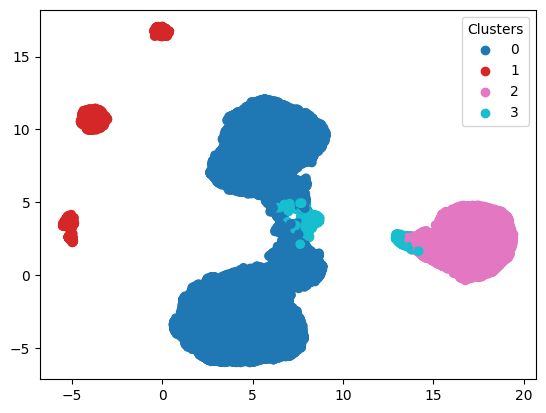

In [45]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['st_ward4'])

### MinMax Scaler <a id='h-mm'></a>

#### Plot

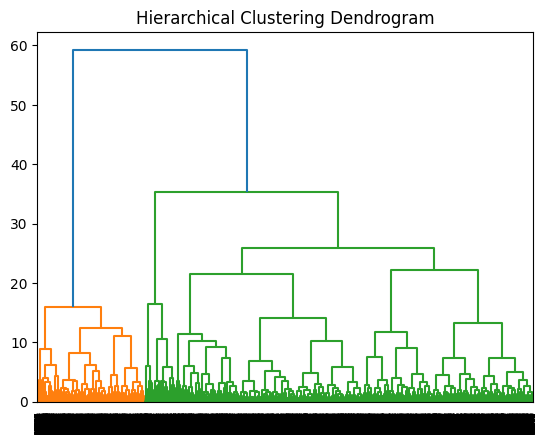

In [46]:
plot_dendrogram(sample_mm_scl, 'ward')

#### Models

##### 2 clusters

In [47]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [48]:
groupby_mean(sample_original, 'mm_ward2', True, 12)

# observations per cluster: [19098, 5328]


mm_ward2,0,1
frequency_items,37.540000,40.450000
potencial_score,15.080000,80.150000
longevity_months,14.560000,16.540000
relevance_criteria,1.900000,2.000000
recency_in_weeks,15.420000,14.750000
promotional_percentage,10.860000,13.780000
returns,3.100000,5.580000
flaged,0.010000,0.000000
credit_factor,0.930000,0.820000
zip_code,3.810000,7.660000


general | score

##### 3 clusters

In [56]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [57]:
groupby_mean(sample_original, 'mm_ward3', True, 12)

# observations per cluster: [17622, 5328, 1476]


mm_ward3,0,1,2
frequency_items,37.400000,40.450000,39.260000
potencial_score,13.680000,80.150000,31.880000
longevity_months,14.500000,16.540000,15.290000
relevance_criteria,2.000000,2.000000,0.720000
recency_in_weeks,15.410000,14.750000,15.470000
promotional_percentage,11.760000,13.780000,0.090000
returns,2.640000,5.580000,8.590000
flaged,0.000000,0.000000,0.110000
credit_factor,0.950000,0.820000,0.660000
zip_code,3.740000,7.660000,4.700000


general | score | nopromo

##### 4 clusters

In [58]:
sample_original['mm_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_mm_scl)

In [59]:
groupby_mean(sample_original, 'mm_ward4', True, 12)

# observations per cluster: [8395, 9227, 1476, 5328]


mm_ward4,0,1,2,3
frequency_items,35.800000,38.850000,39.260000,40.450000
potencial_score,25.000000,3.380000,31.880000,80.150000
longevity_months,17.840000,11.470000,15.290000,16.540000
relevance_criteria,2.000000,2.000000,0.720000,2.000000
recency_in_weeks,15.040000,15.750000,15.470000,14.750000
promotional_percentage,6.710000,16.360000,0.090000,13.780000
returns,1.940000,3.280000,8.590000,5.580000
flaged,0.000000,0.000000,0.110000,0.000000
credit_factor,0.820000,1.070000,0.660000,0.820000
zip_code,6.620000,1.120000,4.700000,7.660000


general | new+pormo? | nopromo | score

In [53]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [60]:
groupby_mean(sample_original, 'mm_ward5', True, 12)

# observations per cluster: [9227, 5328, 1476, 4954, 3441]


mm_ward5,0,1,2,3,4
frequency_items,38.850000,40.450000,39.260000,34.600000,37.540000
potencial_score,3.380000,80.150000,31.880000,29.530000,18.460000
longevity_months,11.470000,16.540000,15.290000,11.750000,26.600000
relevance_criteria,2.000000,2.000000,0.720000,2.000000,2.000000
recency_in_weeks,15.750000,14.750000,15.470000,14.980000,15.120000
promotional_percentage,16.360000,13.780000,0.090000,7.280000,5.890000
returns,3.280000,5.580000,8.590000,1.550000,2.490000
flaged,0.000000,0.000000,0.110000,0.000000,0.000000
credit_factor,1.070000,0.820000,0.660000,0.760000,0.910000
zip_code,1.120000,7.660000,4.700000,7.700000,5.060000


lowscore+promo | score | nopromo | general | antiques

In [54]:
sample_original['mm_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_mm_scl)

In [55]:
groupby_mean(sample_original, 'mm_ward6', True, 12)

# observations per cluster: [1476, 5328, 6067, 4954, 3441, 3160]


mm_ward6,0,1,2,3,4,5
frequency_items,39.260000,40.450000,39.820000,34.600000,37.540000,36.990000
potencial_score,31.880000,80.150000,0.510000,29.530000,18.460000,8.900000
longevity_months,15.290000,16.540000,10.580000,11.750000,26.600000,13.180000
relevance_criteria,0.720000,2.000000,2.000000,2.000000,2.000000,2.000000
recency_in_weeks,15.470000,14.750000,15.740000,14.980000,15.120000,15.770000
promotional_percentage,0.090000,13.780000,5.520000,7.280000,5.890000,37.150000
returns,8.590000,5.580000,2.370000,1.550000,2.490000,5.020000
flaged,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000
credit_factor,0.660000,0.820000,0.810000,0.760000,0.910000,1.560000
zip_code,4.700000,7.660000,0.420000,7.700000,5.060000,2.470000


nopromo+lowrelevance | score | lowscore | general | antiques | promo

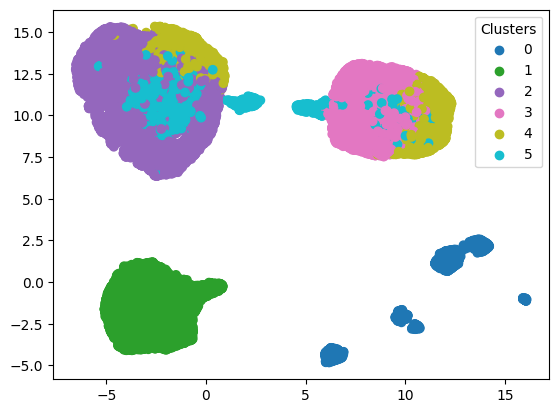

In [65]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_ward6'])

#### Comparison

In [207]:
clusters_comparison(sample_original, 'mm_ward3', 'mm_ward2')

,mm_ward2 0 Cluster,mm_ward2 1 Cluster
mm_ward3 0 Cluster,17593,0
mm_ward3 1 Cluster,0,5308
mm_ward3 2 Cluster,1525,0


In [208]:
clusters_comparison(sample_original, 'mm_ward4', 'mm_ward3')

,mm_ward3 0 Cluster,mm_ward3 1 Cluster,mm_ward3 2 Cluster
mm_ward4 0 Cluster,13048,0,0
mm_ward4 1 Cluster,0,5308,0
mm_ward4 2 Cluster,0,0,1525
mm_ward4 3 Cluster,4545,0,0


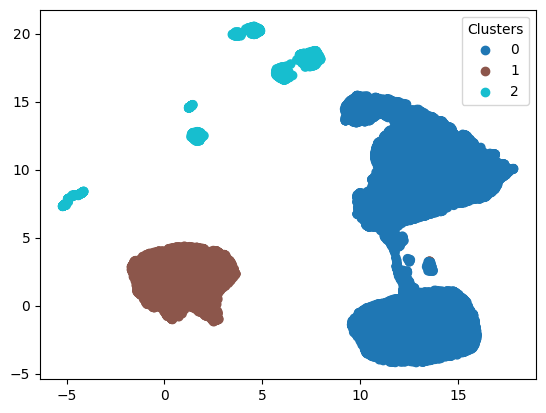

In [215]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_ward3'])

### Robust Scaler <a id='h-rb'></a>

#### Plot

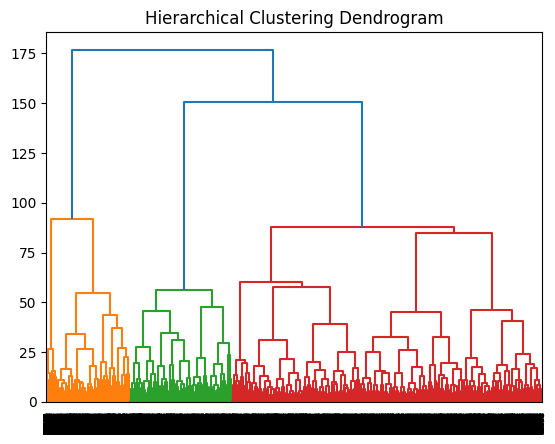

In [67]:
plot_dendrogram(sample_rb_scl, 'ward')

#### Models

##### 3 clusters

In [68]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [69]:
groupby_mean(sample_original, 'rb_ward3', True, 12)

# observations per cluster: [4163, 15220, 5043]


rb_ward3,0,1,2
frequency_items,37.080000,37.530000,41.010000
potencial_score,22.540000,14.260000,80.180000
longevity_months,13.550000,14.860000,16.590000
relevance_criteria,2.000000,1.910000,1.900000
recency_in_weeks,15.630000,15.310000,14.860000
promotional_percentage,39.480000,5.300000,7.090000
returns,6.460000,2.330000,5.260000
flaged,0.000000,0.010000,0.020000
credit_factor,1.420000,0.800000,0.790000
zip_code,3.720000,3.900000,7.690000


promo | general | score

##### 4 clusters

In [72]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [73]:
groupby_mean(sample_original, 'rb_ward4', True, 12)

# observations per cluster: [15220, 3650, 5043, 513]


rb_ward4,0,1,2,3
frequency_items,37.530000,36.690000,41.010000,39.900000
potencial_score,14.260000,19.000000,80.180000,47.750000
longevity_months,14.860000,13.020000,16.590000,17.310000
relevance_criteria,1.910000,2.000000,1.900000,1.990000
recency_in_weeks,15.310000,15.810000,14.860000,14.330000
promotional_percentage,5.300000,33.680000,7.090000,80.710000
returns,2.330000,3.480000,5.260000,27.660000
flaged,0.010000,0.000000,0.020000,0.000000
credit_factor,0.800000,1.490000,0.790000,0.900000
zip_code,3.900000,3.400000,7.690000,6.000000


##### 5 clusters

In [74]:
sample_original['rb_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_rb_scl)

In [75]:
groupby_mean(sample_original, 'rb_ward5', True, 12)

# observations per cluster: [8983, 6237, 5043, 513, 3650]


rb_ward5,0,1,2,3,4
frequency_items,39.310000,34.980000,41.010000,39.900000,36.690000
potencial_score,14.300000,14.190000,80.180000,47.750000,19.000000
longevity_months,15.190000,14.390000,16.590000,17.310000,13.020000
relevance_criteria,2.000000,1.780000,1.900000,1.990000,2.000000
recency_in_weeks,13.340000,18.140000,14.860000,14.330000,15.810000
promotional_percentage,6.000000,4.290000,7.090000,80.710000,33.680000
returns,2.240000,2.460000,5.260000,27.660000,3.480000
flaged,0.000000,0.010000,0.020000,0.000000,0.000000
credit_factor,0.800000,0.810000,0.790000,0.900000,1.490000
zip_code,4.000000,3.760000,7.690000,6.000000,3.400000


##### 6 clusters

In [70]:
sample_original['rb_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_rb_scl)

In [71]:
groupby_mean(sample_original, 'rb_ward6', True, 12)

# observations per cluster: [6237, 3650, 5043, 513, 3881, 5102]


rb_ward6,0,1,2,3,4,5
frequency_items,34.980000,36.690000,41.010000,39.900000,51.580000,29.970000
potencial_score,14.190000,19.000000,80.180000,47.750000,10.550000,17.160000
longevity_months,14.390000,13.020000,16.590000,17.310000,17.320000,13.570000
relevance_criteria,1.780000,2.000000,1.900000,1.990000,2.000000,2.000000
recency_in_weeks,18.140000,15.810000,14.860000,14.330000,14.150000,12.720000
promotional_percentage,4.290000,33.680000,7.090000,80.710000,5.990000,6.010000
returns,2.460000,3.480000,5.260000,27.660000,2.560000,2.000000
flaged,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000
credit_factor,0.810000,1.490000,0.790000,0.900000,0.830000,0.770000
zip_code,3.760000,3.400000,7.690000,6.000000,3.120000,4.670000


longtimenosee | ? | score | promo+returns | freq+lowscore+ | ?

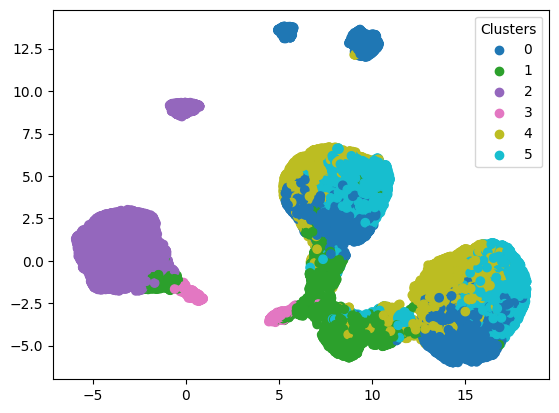

In [79]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_ward6'])

#### Comparison

### Inter clustering Comparison <a id='icc'></a>

#### Scaler Comparison
In this section it is possible understand that both **minmax** and **robust** scalers are the ones that presented more **consistent results**, in the sense that independently of the clustering method used (hierarchical with ward or kmeans), the clustering solutions were very similar and the observations belonging to the clusters formed also did not have a lot of variation.

The variations for the solutions built using the other scaling methods (unscaled data and standard scaler) was especially noticeable when the the clustering solution had more than 3 clusters.

##### No Scaler

In [ ]:
clusters_comparison(sample_original, 'no_kmeans3', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_kmeans3 0 Cluster,8713,54,26
no_kmeans3 1 Cluster,160,25,7764
no_kmeans3 2 Cluster,86,7581,17


In [ ]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_ward4')

,no_ward4 0 Cluster,no_ward4 1 Cluster,no_ward4 2 Cluster,no_ward4 3 Cluster
no_kmeans4 0 Cluster,3758,24,37,50
no_kmeans4 1 Cluster,75,24,7743,8
no_kmeans4 2 Cluster,1796,36,10,3201
no_kmeans4 3 Cluster,41,7576,17,30


##### Standard Scaler

In [ ]:
clusters_comparison(sample_original, 'st_kmeans3', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_kmeans3 0 Cluster,7780,37,41
st_kmeans3 1 Cluster,85,8639,82
st_kmeans3 2 Cluster,39,1324,6399


In [ ]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_ward4')

,st_ward4 0 Cluster,st_ward4 1 Cluster,st_ward4 2 Cluster,st_ward4 3 Cluster
st_kmeans4 0 Cluster,37,5,41,7753
st_kmeans4 1 Cluster,1325,0,6399,27
st_kmeans4 2 Cluster,8638,2,80,47
st_kmeans4 3 Cluster,0,64,2,6


##### MinMax Scaler

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans3', 'mm_ward3')

,mm_ward3 0 Cluster,mm_ward3 1 Cluster,mm_ward3 2 Cluster
mm_kmeans3 0 Cluster,7707,1,75
mm_kmeans3 1 Cluster,14,7756,72
mm_kmeans3 2 Cluster,76,3,8722


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_ward4')

,mm_ward4 0 Cluster,mm_ward4 1 Cluster,mm_ward4 2 Cluster,mm_ward4 3 Cluster
mm_kmeans4 0 Cluster,27,1,5139,65
mm_kmeans4 1 Cluster,64,7754,10,0
mm_kmeans4 2 Cluster,8697,3,23,0
mm_kmeans4 3 Cluster,81,2,112,2448


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_ward5')

,mm_ward5 0 Cluster,mm_ward5 1 Cluster,mm_ward5 2 Cluster,mm_ward5 3 Cluster,mm_ward5 4 Cluster
mm_kmeans5 0 Cluster,0,65,804,3,3062
mm_kmeans5 1 Cluster,7754,55,10,0,6
mm_kmeans5 2 Cluster,1,19,4337,72,0
mm_kmeans5 3 Cluster,2,59,116,2438,4
mm_kmeans5 4 Cluster,3,5451,17,0,148


##### Robust Scaler

In [ ]:
clusters_comparison(sample_original, 'rb_kmeans3', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_kmeans3 0 Cluster,18731,9,3
rb_kmeans3 1 Cluster,163,2,5471
rb_kmeans3 2 Cluster,0,47,0


In [ ]:
clusters_comparison(sample_original, 'rb_kmeans4', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_kmeans4 0 Cluster,355,13132,3,12
rb_kmeans4 1 Cluster,0,0,0,44
rb_kmeans4 2 Cluster,26,134,5470,2
rb_kmeans4 3 Cluster,5170,77,1,0


In [ ]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_ward6')

,rb_ward6 0 Cluster,rb_ward6 1 Cluster,rb_ward6 2 Cluster,rb_ward6 3 Cluster,rb_ward6 4 Cluster,rb_ward6 5 Cluster
rb_kmeans6 0 Cluster,0,20,2,4225,2,1
rb_kmeans6 1 Cluster,4,178,3,392,17,7522
rb_kmeans6 2 Cluster,5,5425,1,23,0,18
rb_kmeans6 3 Cluster,2,119,5465,4,0,3
rb_kmeans6 4 Cluster,44,0,0,0,0,0
rb_kmeans6 5 Cluster,3,53,3,18,870,4


#### Method comparison
Here, the two scalers deemed to provide better clustering results were compared. It is possible to understand that their division process is quite different.

When analysing the previous sections of this notebook, it was possible to confirm this fact. A good example to understand this is the beer+watre+frozen cluster. While it is one of the first clusters to be differenciated when using minmax scaled data, this cluster only appears in the las division we tested (with 6 clusters) when using the robust scaled data.

In [ ]:
clusters_comparison(sample_original, 'mm_kmeans3', 'rb_kmeans3')

,rb_kmeans3 0 Cluster,rb_kmeans3 1 Cluster,rb_kmeans3 2 Cluster
mm_kmeans3 0 Cluster,5545,2235,3
mm_kmeans3 1 Cluster,7754,72,16
mm_kmeans3 2 Cluster,5444,3329,28


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans4', 'rb_kmeans4')

,rb_kmeans4 0 Cluster,rb_kmeans4 1 Cluster,rb_kmeans4 2 Cluster,rb_kmeans4 3 Cluster
mm_kmeans4 0 Cluster,131,2,1374,3725
mm_kmeans4 1 Cluster,7718,14,67,29
mm_kmeans4 2 Cluster,5345,25,3281,72
mm_kmeans4 3 Cluster,308,3,910,1422


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans5', 'rb_kmeans5')

,rb_kmeans5 0 Cluster,rb_kmeans5 1 Cluster,rb_kmeans5 2 Cluster,rb_kmeans5 3 Cluster,rb_kmeans5 4 Cluster
mm_kmeans5 0 Cluster,11,0,3905,5,13
mm_kmeans5 1 Cluster,79,10,63,13,7660
mm_kmeans5 2 Cluster,34,3682,555,1,157
mm_kmeans5 3 Cluster,776,478,905,2,458
mm_kmeans5 4 Cluster,67,42,174,23,5313


In [ ]:
clusters_comparison(sample_original, 'mm_kmeans6', 'rb_kmeans6')

,rb_kmeans6 0 Cluster,rb_kmeans6 1 Cluster,rb_kmeans6 2 Cluster,rb_kmeans6 3 Cluster,rb_kmeans6 4 Cluster,rb_kmeans6 5 Cluster
mm_kmeans6 0 Cluster,21,16,5336,167,22,57
mm_kmeans6 1 Cluster,7,3983,9,39,4,27
mm_kmeans6 2 Cluster,4,3668,10,26,10,46
mm_kmeans6 3 Cluster,520,391,23,904,2,776
mm_kmeans6 4 Cluster,3698,58,81,554,1,34
mm_kmeans6 5 Cluster,0,0,13,3903,5,11


## 4.3. DBScan <a id='dbs'></a>

This section aims to help define what would be the **best number of clusters** to consider for each of the data inputs as well as provide more possible clustering solutions. As previously mentioned, minmax and robust scaled data were the data inputs that remained for further analysis, therefore **DBScan** will only be tested for these cases.

For each input, a Kdist graph was plotted (to help find the right eps value). Then, **parameters were adjusted**, and clustering solutions created. These solutions were once again compared.

The data inputs were tested in the following order:
1. [MinMax Scaler](#dbs-mm)
4. [Robust Scaler](#dbs-rb)


### MinMax Scaler <a id='dbs-mm'></a>

#### Plot

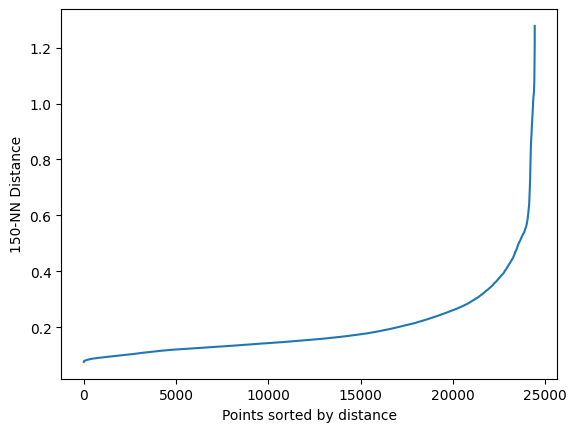

In [26]:
plot_kdist_graph(sample_mm_scl, demographic_metrics)

#### Models

##### 3 clusters

In [55]:
dbscan = DBSCAN(eps=0.4, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs3'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 22824, np.int64(1): 497, np.int64(-1): 404, np.int64(2): 371, np.int64(4): 190, np.int64(3): 140})
Percentage of noise rows      : 1.65


In [56]:
groupby_mean(sample_original, 'mm_dbs3', True)

# observations per cluster: [404, 22824, 497, 371, 140, 190]


mm_dbs3,-1,0,1,2,3,4
frequency_items,39.250000,38.130000,37.880000,39.420000,38.780000,39.550000
potencial_score,53.590000,29.020000,52.420000,0.510000,33.770000,0.450000
zip_code,6.320000,4.650000,7.990000,0.000000,7.960000,0.000000
longevity_months,17.270000,14.960000,16.860000,11.910000,15.560000,15.180000
credit_factor,1.040000,0.910000,0.830000,0.940000,0.080000,0.250000
relevance_criteria,1.080000,2.000000,1.000000,1.000000,0.000000,0.000000
recency_in_weeks,14.160000,15.260000,15.910000,16.010000,14.460000,15.770000
returns,56.460000,2.760000,4.020000,2.010000,0.000000,1.450000
flaged,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000
promotional_percentage,8.240000,12.150000,0.250000,0.000000,0.000000,0.000000


outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy

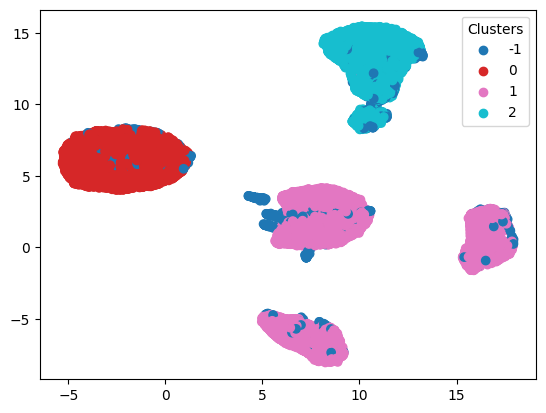

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs3'])

##### 4 clusters

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs4'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(1): 9456, np.int64(0): 7460, np.int64(2): 5114, np.int64(-1): 1656, np.int64(3): 740})
Percentage of noise rows      : 6.78


In [ ]:
groupby_mean(sample_original, 'mm_dbs4', True)

# observations per cluster: [1656, 7460, 9456, 5114, 740]


mm_dbs4,-1,0,1,2,3
beer,67.730000,83.880000,45.060000,44.970000,45.480000
bottled_water,54.770000,84.150000,44.530000,44.770000,45.150000
bread,41.950000,29.760000,29.730000,17.950000,29.860000
meat,21.730000,0.730000,0.870000,0.830000,0.590000
dairy,71.930000,29.880000,31.820000,82.880000,82.690000
fresh_foods,80.660000,32.350000,97.510000,31.720000,31.260000
frozen_foods,98.090000,109.150000,59.160000,32.310000,31.800000
fruit_beverages,59.950000,20.470000,85.600000,20.300000,20.090000
pastry,67.550000,30.600000,67.890000,30.580000,112.960000
sodas,65.220000,32.360000,32.810000,32.010000,30.100000


outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy | pastry+wines+dairy

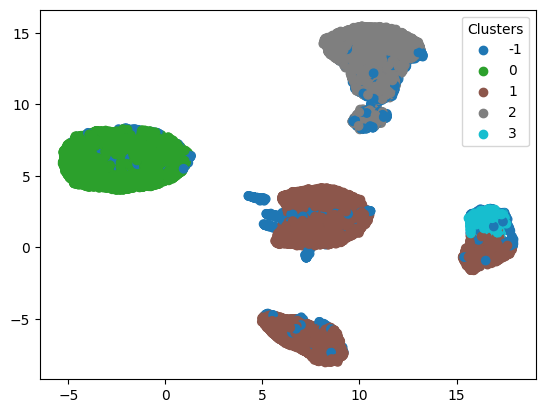

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs4'])

##### 5 clusters

In [ ]:
dbscan = DBSCAN(eps=0.09, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 7405, np.int64(1): 5120, np.int64(4): 5063, np.int64(2): 3020, np.int64(3): 1931, np.int64(-1): 1887})
Percentage of noise rows      : 7.73


In [ ]:
groupby_mean(sample_original, 'mm_dbs5', True)

# observations per cluster: [1887, 7405, 5120, 3020, 1931, 5063]


mm_dbs5,-1,0,1,2,3,4
beer,66.570000,83.850000,44.990000,45.010000,45.210000,44.940000
bottled_water,54.660000,84.140000,44.550000,44.430000,44.890000,44.790000
bread,40.500000,29.740000,29.790000,29.650000,29.640000,17.870000
meat,19.750000,0.680000,0.770000,1.000000,0.600000,0.780000
dairy,68.400000,29.830000,29.870000,29.880000,59.040000,83.100000
fresh_foods,79.740000,32.240000,107.290000,106.940000,31.200000,31.700000
frozen_foods,96.050000,109.030000,81.750000,31.650000,31.440000,31.900000
fruit_beverages,59.220000,20.430000,95.400000,95.110000,20.050000,20.280000
pastry,66.560000,30.540000,30.600000,112.990000,112.770000,30.550000
sodas,62.790000,32.180000,32.640000,33.000000,31.150000,31.970000


outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | pastry+dairy | dairy

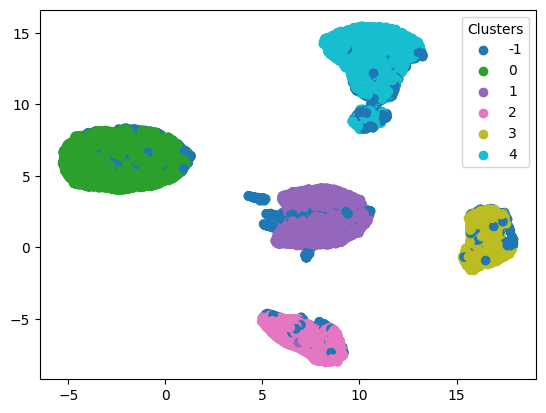

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs5'])

##### 6 clusters

In [ ]:
dbscan = DBSCAN(eps=0.085, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 7
Counter of cluster labels     : Counter({np.int64(0): 7355, np.int64(1): 5035, np.int64(4): 4787, np.int64(2): 2979, np.int64(-1): 2569, np.int64(3): 1043, np.int64(5): 658})
Percentage of noise rows      : 10.52


In [ ]:
groupby_mean(sample_original, 'mm_dbs6', True)

# observations per cluster: [2569, 7355, 5035, 2979, 1043, 4787, 658]


mm_dbs6,-1,0,1,2,3,4,5
beer,61.690000,83.850000,44.960000,45.000000,45.080000,44.950000,45.330000
bottled_water,52.840000,84.150000,44.540000,44.410000,44.710000,44.790000,45.070000
bread,37.260000,29.740000,29.760000,29.650000,29.430000,17.450000,29.830000
meat,14.910000,0.670000,0.730000,0.970000,0.550000,0.760000,0.550000
dairy,67.660000,29.830000,29.830000,29.870000,41.020000,83.150000,83.170000
fresh_foods,71.170000,32.170000,107.210000,106.930000,31.440000,31.640000,30.730000
frozen_foods,82.200000,109.020000,81.930000,31.530000,31.180000,31.790000,31.660000
fruit_beverages,52.750000,20.400000,95.350000,95.090000,20.170000,20.280000,19.850000
pastry,66.190000,30.510000,30.500000,112.890000,112.630000,30.520000,112.810000
sodas,54.930000,32.210000,32.640000,32.880000,31.650000,31.960000,29.380000


outliers | beer+water+frozen | fresh+beverage+frozen | fresh+beverage+pastry | pastry | dairy | pastry+wines+dairy

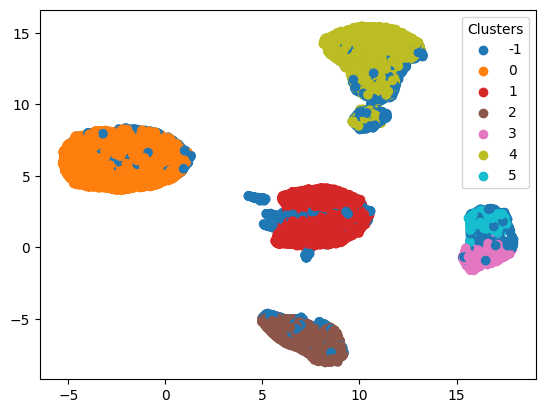

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_dbs6'])

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'mm_dbs4', 'mm_dbs3')

,mm_dbs3 0 Cluster,mm_dbs3 1 Cluster,mm_dbs3 2 Cluster,mm_dbs3 3 Cluster
mm_dbs4 0 Cluster,1259,10,200,187
mm_dbs4 1 Cluster,0,7460,0,0
mm_dbs4 2 Cluster,0,0,9456,0
mm_dbs4 3 Cluster,0,0,1,5113
mm_dbs4 4 Cluster,0,0,740,0


In [ ]:
clusters_comparison(sample_original, 'mm_dbs5', 'mm_dbs4')

,mm_dbs4 0 Cluster,mm_dbs4 1 Cluster,mm_dbs4 2 Cluster,mm_dbs4 3 Cluster,mm_dbs4 4 Cluster
mm_dbs5 0 Cluster,1577,55,143,96,16
mm_dbs5 1 Cluster,0,7405,0,0,0
mm_dbs5 2 Cluster,3,0,5117,0,0
mm_dbs5 3 Cluster,4,0,3016,0,0
mm_dbs5 4 Cluster,27,0,1179,1,724
mm_dbs5 5 Cluster,45,0,1,5017,0


In [ ]:
clusters_comparison(sample_original, 'mm_dbs6', 'mm_dbs5')

,mm_dbs5 0 Cluster,mm_dbs5 1 Cluster,mm_dbs5 2 Cluster,mm_dbs5 3 Cluster,mm_dbs5 4 Cluster,mm_dbs5 5 Cluster
mm_dbs6 0 Cluster,1887,50,83,42,231,276
mm_dbs6 1 Cluster,0,7355,0,0,0,0
mm_dbs6 2 Cluster,0,0,5035,0,0,0
mm_dbs6 3 Cluster,0,0,2,2977,0,0
mm_dbs6 4 Cluster,0,0,0,1,1042,0
mm_dbs6 5 Cluster,0,0,0,0,0,4787
mm_dbs6 6 Cluster,0,0,0,0,658,0


### Robust Scaler <a id='dbs-rb'></a>

#### Plot

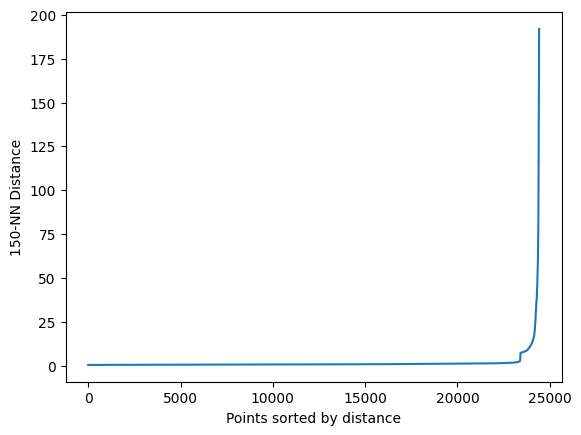

In [220]:
plot_kdist_graph(sample_rb_scl, demographic_metrics_selection1)

#### Models

##### 3 clusters

In [223]:
dbscan = DBSCAN(eps=0.8, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs3'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 7
Counter of cluster labels     : Counter({np.int64(0): 16563, np.int64(2): 4665, np.int64(-1): 2341, np.int64(1): 576, np.int64(3): 184, np.int64(4): 61, np.int64(5): 36})
Percentage of noise rows      : 9.58


In [224]:
groupby_mean(sample_original, 'rb_dbs3', True)

# observations per cluster: [2341, 16563, 576, 4665, 184, 61, 36]


rb_dbs3,-1,0,1,2,3,4,5
frequency_items,42.190000,37.180000,37.600000,39.760000,37.150000,37.920000,42.640000
potencial_score,42.930000,13.770000,11.430000,80.130000,6.680000,79.880000,1.850000
longevity_months,16.640000,14.420000,13.080000,16.490000,14.760000,15.670000,7.640000
relevance_criteria,1.620000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000
recency_in_weeks,14.370000,15.460000,16.110000,14.870000,16.660000,17.210000,16.250000
promotional_percentage,30.140000,9.850000,0.010000,9.640000,0.000000,0.130000,60.190000
returns,37.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
flaged,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
credit_factor,0.840000,0.950000,0.880000,0.810000,0.220000,0.870000,1.320000
zip_code,5.680000,3.750000,3.030000,7.660000,1.860000,7.870000,0.670000


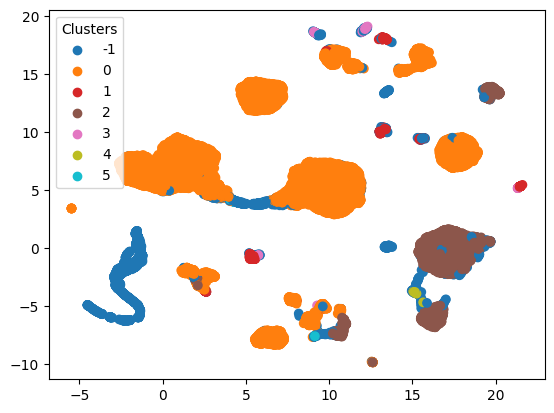

In [225]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_dbs3'])

##### 5 clusters

In [ ]:
dbscan = DBSCAN(eps=1.22, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 7436, np.int64(1): 5164, np.int64(2): 5133, np.int64(3): 4531, np.int64(-1): 1477, np.int64(4): 685})
Percentage of noise rows      : 6.05


In [ ]:
groupby_mean(sample_original, 'rb_dbs5', True)

# observations per cluster: [1477, 7436, 5164, 5133, 4531, 685]


rb_dbs5,-1,0,1,2,3,4
beer,71.540000,83.810000,45.040000,45.110000,45.000000,44.950000
bottled_water,56.240000,84.120000,44.620000,44.610000,44.760000,45.410000
bread,44.420000,29.680000,29.730000,29.590000,16.500000,29.220000
meat,25.150000,0.700000,0.750000,0.780000,0.820000,0.650000
dairy,69.160000,29.830000,29.840000,41.970000,83.280000,83.390000
fresh_foods,87.140000,32.410000,107.200000,76.460000,31.840000,32.620000
frozen_foods,109.930000,109.120000,81.900000,31.600000,31.820000,32.020000
fruit_beverages,66.080000,20.510000,95.170000,64.800000,20.380000,19.750000
pastry,68.270000,30.400000,30.470000,112.790000,30.460000,30.520000
sodas,73.810000,32.060000,32.480000,32.140000,31.980000,30.110000


outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+frozen | dairy | veggies+wines+dairy

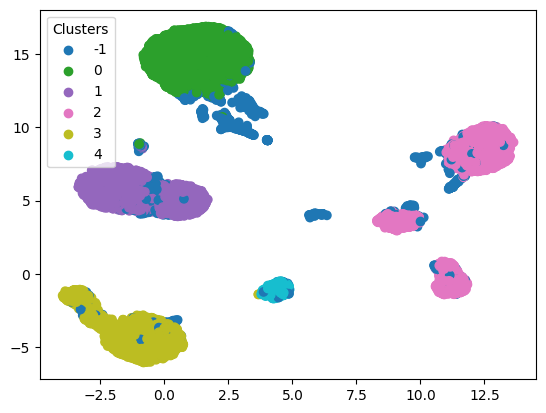

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_dbs5'])

##### 6 clusters

In [ ]:
dbscan = DBSCAN(eps=1.03, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 7
Counter of cluster labels     : Counter({np.int64(0): 7279, np.int64(1): 4977, np.int64(3): 4100, np.int64(2): 4013, np.int64(-1): 2868, np.int64(4): 695, np.int64(5): 494})
Percentage of noise rows      : 11.74


In [ ]:
groupby_mean(sample_original, 'rb_dbs6', True)

# observations per cluster: [2868, 7279, 4977, 4013, 4100, 695, 494]


rb_dbs6,-1,0,1,2,3,4,5
beer,61.190000,83.840000,44.940000,44.980000,44.890000,45.390000,44.810000
bottled_water,52.740000,84.180000,44.580000,44.480000,44.750000,45.360000,45.500000
bread,35.930000,29.660000,29.680000,29.520000,16.110000,29.770000,29.490000
meat,14.040000,0.630000,0.640000,0.710000,0.700000,0.490000,0.640000
dairy,66.890000,29.790000,29.740000,32.630000,83.200000,83.380000,83.500000
fresh_foods,69.100000,32.250000,107.220000,86.890000,31.680000,30.860000,31.900000
frozen_foods,80.670000,108.980000,81.810000,31.400000,31.580000,31.280000,32.180000
fruit_beverages,51.710000,20.400000,95.230000,75.370000,20.310000,19.970000,19.760000
pastry,63.340000,30.250000,30.290000,112.630000,30.310000,112.670000,30.250000
sodas,56.480000,31.790000,32.300000,32.100000,31.530000,28.060000,28.150000


beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | dairy | pastry+dairy | veggies+dairy

#### Comparison

In [ ]:
clusters_comparison(sample_original, 'rb_dbs5', 'rb_dbs3')

,rb_dbs3 0 Cluster,rb_dbs3 1 Cluster,rb_dbs3 2 Cluster,rb_dbs3 3 Cluster
rb_dbs5 0 Cluster,1238,108,55,76
rb_dbs5 1 Cluster,0,7436,0,0
rb_dbs5 2 Cluster,0,5164,0,0
rb_dbs5 3 Cluster,0,0,5133,0
rb_dbs5 4 Cluster,0,2,0,4529
rb_dbs5 5 Cluster,0,0,0,685


In [ ]:
clusters_comparison(sample_original, 'rb_dbs6', 'rb_dbs5')

,rb_dbs5 0 Cluster,rb_dbs5 1 Cluster,rb_dbs5 2 Cluster,rb_dbs5 3 Cluster,rb_dbs5 4 Cluster,rb_dbs5 5 Cluster
rb_dbs6 0 Cluster,1477,157,187,425,430,192
rb_dbs6 1 Cluster,0,7279,0,0,0,0
rb_dbs6 2 Cluster,0,0,4977,0,0,0
rb_dbs6 3 Cluster,0,0,0,4013,0,0
rb_dbs6 4 Cluster,0,0,0,0,4100,0
rb_dbs6 5 Cluster,0,0,0,695,0,0
rb_dbs6 6 Cluster,0,0,0,0,1,493


### Conclusions <a id='conc'></a>

Based on the results obtained through DBScan, clustering solutions with 4 and 6 clusters were eliminated from further analysis. This happens as clusterings with 6 clusters presented high percentages of outliers (>10%) and as a solution with 4 clusters was not found for the robust scaled data. 

Having said this, it was decided to compare the until now found solutions with minmax and robust scaled data and 3 or 5 clusters.

| Method | Scaler | # Clusters | bwf | fbfp | fbf | pfb | d | dp | dpvw | dvw | s | g | note |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| kmeans | minmax | 3 | x | x |  |  |  | x |  | | | |  |
| kmeans | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| ward | minmax | 3 | x | x |  |  |  | x |  |  |  |  |  |
| ward | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| dbscan | minmax | 3 | x | x |  |  | x |  |  |  |  |  |  |
| dbscan | robust | 3 |  |  |  | x | x |  |  | | | x | disregarded |
| kmeans | minmax | 5 | x |  | x | x | x |  | x | | | |  |
| kmeans | robust | 5 |  |  |  | x | x |  |  | x | x | x | disregarded |
| ward | minmax | 5 | x |  | x | x |  | x | x |  |  |  |  |
| dbscan | minmax | 5 | x |  | x | x | x | x |  |  |  |  |  |
| dbscan | robust | 5 | x |  | x | x | x |  | x | | | |  |


- bwf -> beer+water+frozen
- fbfp -> fresh+beverage+frozen+pastry
- fbf -> fresh+beverage+frozen
- pfb -> pastry+fresh+beverage
- d -> dairy
- dp -> dairy+pastry
- dpvw -> dairy+pastry+veggies+wine
- dvw -> dairy+veggies+wine
- s -> spenders
- g -> general


With this analysis it was concluded that a best solution for **3 clusters** would include: 
- beer+water+frozen
- fresh+beverage+frozen+pastry
- dairy+pastry

(this is the case of kmeans with minmax scaler)

And a best solution for **5 clusters** would include:
-  beer+water+frozen
- fresh+beverage+frozen
- pastry+fresh+beverage
- dairy
- dairy+pastry+veggies+wine

(this is the case for kmeans with minmax scaler and dbscan with robust scaler)

# Batota UMAP

In [29]:
umap_object = umap.UMAP(random_state=1)

In [30]:
umap_embedding_no = umap_object.fit_transform(sample_no_scl)
umap_embedding_st = umap_object.fit_transform(sample_st_scl)
umap_embedding_mm = umap_object.fit_transform(sample_mm_scl)
umap_embedding_rb = umap_object.fit_transform(sample_rb_scl)

In [31]:
sample_original['constant'] = 1

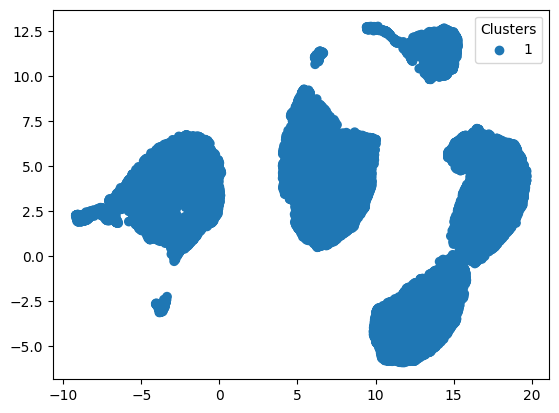

In [32]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['constant'])

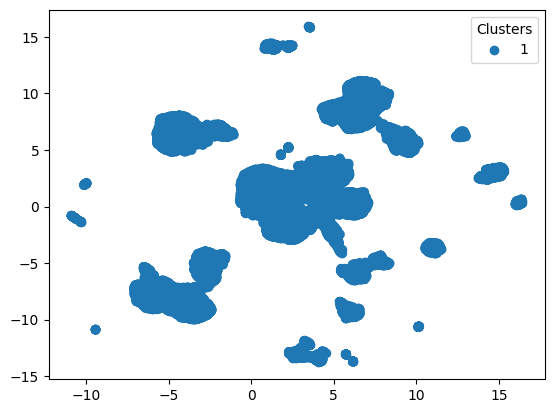

In [33]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['constant'])

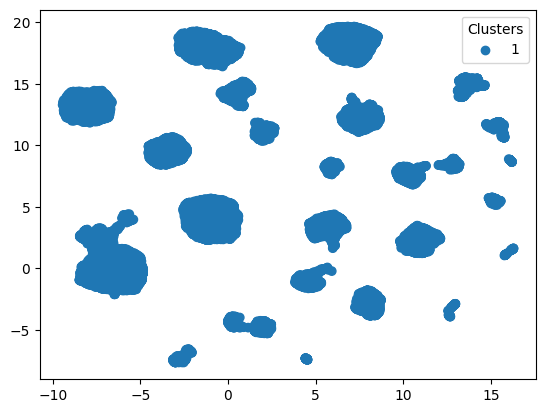

In [34]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['constant'])

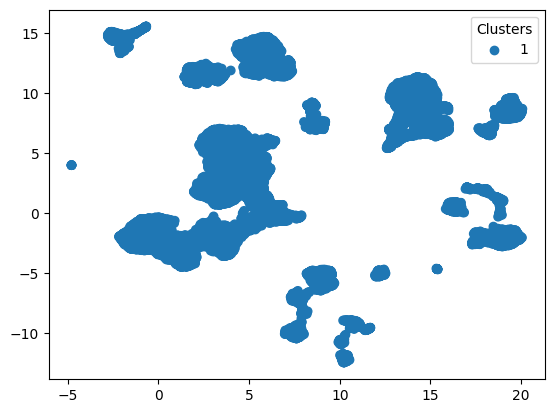

In [35]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['constant'])

In [20]:
demographic_metrics_selection = ['frequency_items', 'potencial_score', 'longevity_months', 'credit_factor',  'relevance_criteria', 'recency_in_weeks', 'promotional_percentage'] # sem zip, flagged e returns

In [21]:
umap_embedding_no_s = umap_object.fit_transform(sample_no_scl[demographic_metrics_selection])
umap_embedding_st_s = umap_object.fit_transform(sample_st_scl[demographic_metrics_selection])
umap_embedding_mm_s = umap_object.fit_transform(sample_mm_scl[demographic_metrics_selection])
umap_embedding_rb_s = umap_object.fit_transform(sample_rb_scl[demographic_metrics_selection])

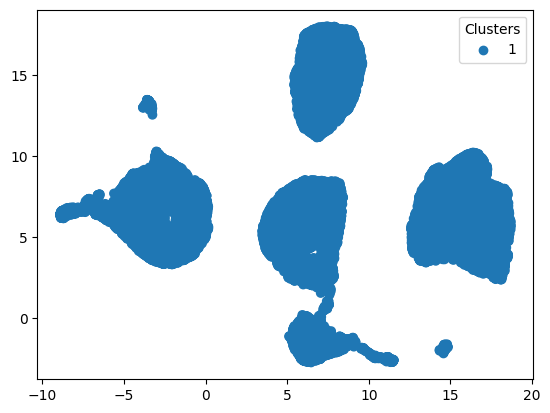

In [22]:
visualize_dimensionality_reduction(umap_embedding_no_s, sample_original['constant'])

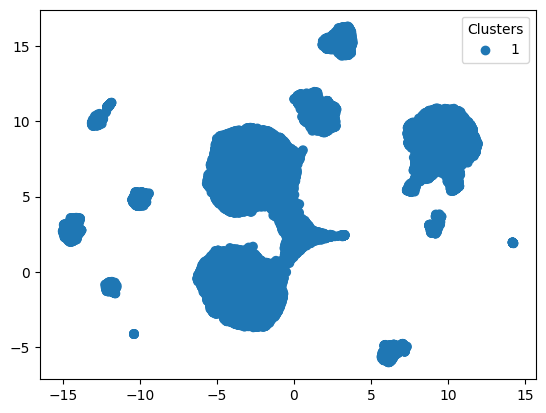

In [23]:
visualize_dimensionality_reduction(umap_embedding_st_s, sample_original['constant'])

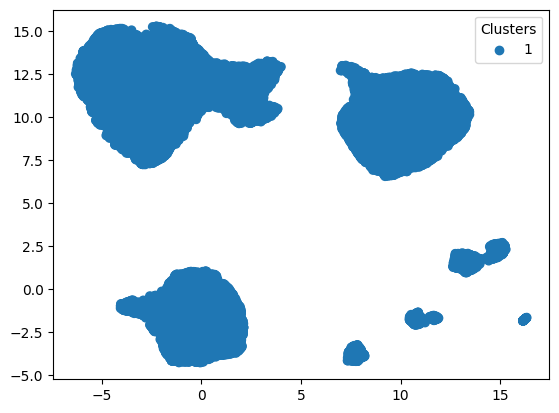

In [24]:
visualize_dimensionality_reduction(umap_embedding_mm_s, sample_original['constant'])

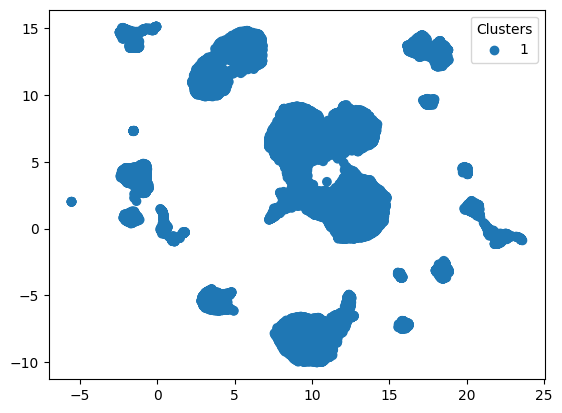

In [25]:
visualize_dimensionality_reduction(umap_embedding_rb_s, sample_original['constant'])